# rBergomi GLU training

In [1]:
import sys
sys.path.append('..')
from rBergomi_utils import *

## 数据读取

In [2]:
xx, yy, strikes, maturities = data_read(r"../../../Data/rBergomiTrainSet.txt.gz")

网格数据形状：(40000, 92)
参数形状：(40000, 4)
隐含波动率曲面形状：(40000, 88)
参数上界: [ 0.16      4.       -0.100011  0.499998]
参数下界: [ 0.0100133  0.300028  -0.949934   0.0250066]


In [3]:
# 训练集的 Upper and Lower Bounds
upper_bound = np.array([0.16,4,-0.1,0.5])
lower_bound = np.array([0.01,0.3,-0.95,0.025])

## 训练 & 测试集 构建

In [4]:
# 确定训练数据
data_loader, train_data, test_data = get_dataset_for_train(xx, yy, upper_bound, lower_bound, device='cuda')

使用设备: cuda


## 训练

----------------------------------- Epoch: 1/50 -----------------------------------
Batch: 0%, Loss: 1.4168614265300796
Test Loss: 1.42248617938494
Batch: 0%, Loss: 1.2824368073320564
Test Loss: 1.3386444544363305
Batch: 0%, Loss: 1.263672574901243
Test Loss: 1.2607720741128923
Batch: 0%, Loss: 1.032535138616606
Test Loss: 1.1876326075895094
Batch: 0%, Loss: 1.240685593425101
Test Loss: 1.119047696214648
Batch: 0%, Loss: 0.9636579461583479
Test Loss: 1.053690302207887
Batch: 0%, Loss: 1.0922270459765853
Test Loss: 0.9924305981678979
Batch: 0%, Loss: 0.8802617104990382
Test Loss: 0.9345392930559119
Batch: 0%, Loss: 0.904812419201043
Test Loss: 0.8759234272857028
Batch: 0%, Loss: 0.8336718200194148
Test Loss: 0.818724529366521
Batch: 0%, Loss: 0.8258469048000204
Test Loss: 0.7627497029748006
Batch: 0%, Loss: 0.640935163922835
Test Loss: 0.7092590126790385
Batch: 0%, Loss: 0.6108250031613329
Test Loss: 0.6572341931788384
Batch: 0%, Loss: 0.7093533052063997
Test Loss: 0.6076262807379392
Ba

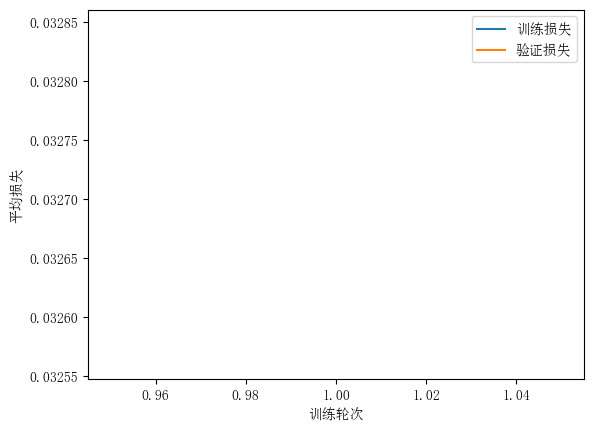

----------------------------------- Epoch: 2/50 -----------------------------------
Batch: 0%, Loss: 0.032016883129599064
Test Loss: 0.03251037158032899
Batch: 0%, Loss: 0.038034762275975485
Test Loss: 0.03182791998514516
Batch: 0%, Loss: 0.042424516495157306
Test Loss: 0.03131795185093749
Batch: 0%, Loss: 0.03415901305849684
Test Loss: 0.030832815310009788
Batch: 0%, Loss: 0.02857903546603501
Test Loss: 0.03039685639528254
Batch: 0%, Loss: 0.02284181550305325
Test Loss: 0.02992982517469007
Batch: 0%, Loss: 0.0361917457895389
Test Loss: 0.029646021608390492
Batch: 0%, Loss: 0.030811796278118506
Test Loss: 0.029428735506794413
Batch: 0%, Loss: 0.0388692857450839
Test Loss: 0.028990086884494372
Batch: 0%, Loss: 0.020197208491890186
Test Loss: 0.02829683994891248
Batch: 0%, Loss: 0.020854246243082998
Test Loss: 0.02786187885563651
Batch: 0%, Loss: 0.031146936354064292
Test Loss: 0.027438434602566043
Batch: 0%, Loss: 0.050141348580514014
Test Loss: 0.027028918064268572
Batch: 0%, Loss: 0.0

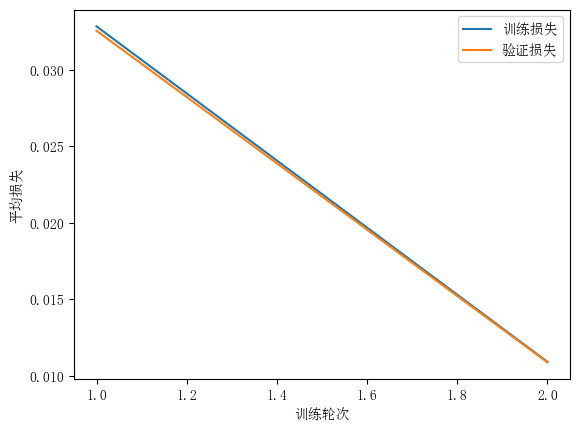

----------------------------------- Epoch: 3/50 -----------------------------------
Batch: 0%, Loss: 0.008974718426527898
Test Loss: 0.010881005459880674
Batch: 0%, Loss: 0.012186391382455246
Test Loss: 0.010877028299808744
Batch: 0%, Loss: 0.011375836575925261
Test Loss: 0.010833240607082227
Batch: 0%, Loss: 0.008147017119301358
Test Loss: 0.010679461471967546
Batch: 0%, Loss: 0.0083193480510639
Test Loss: 0.010638526384776706
Batch: 0%, Loss: 0.010513648320953481
Test Loss: 0.010796798847813554
Batch: 0%, Loss: 0.010756397787228965
Test Loss: 0.010589062868821553
Batch: 0%, Loss: 0.017952143316778798
Test Loss: 0.01049639692344339
Batch: 0%, Loss: 0.011484810946808555
Test Loss: 0.010403127434885546
Batch: 0%, Loss: 0.006320812000499612
Test Loss: 0.010297819950480437
Batch: 0%, Loss: 0.00987179402767458
Test Loss: 0.010253107907794441
Batch: 0%, Loss: 0.009689381676516602
Test Loss: 0.010110956342214629
Batch: 0%, Loss: 0.009664759036248824
Test Loss: 0.010092775580704642
Batch: 0%,

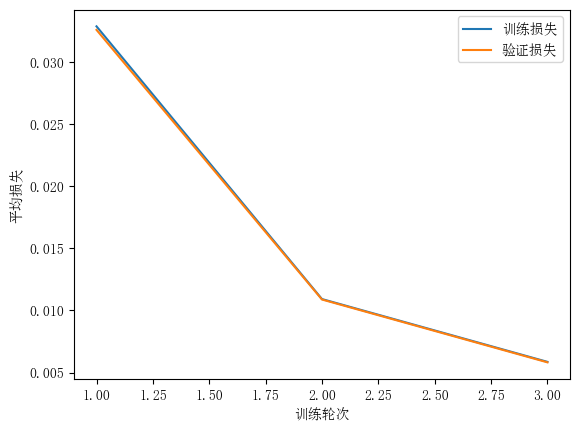

----------------------------------- Epoch: 4/50 -----------------------------------
Batch: 0%, Loss: 0.005408180476214255
Test Loss: 0.0058282596814687405
Batch: 0%, Loss: 0.005883267604513364
Test Loss: 0.00572314515410393
Batch: 0%, Loss: 0.00609436041581268
Test Loss: 0.005644314500504651
Batch: 0%, Loss: 0.0038039822578009525
Test Loss: 0.00566530432727508
Batch: 0%, Loss: 0.004935424051311981
Test Loss: 0.005630102348273394
Batch: 0%, Loss: 0.004264118844253852
Test Loss: 0.0056366831440083105
Batch: 0%, Loss: 0.006948009551601699
Test Loss: 0.0055328604662090225
Batch: 0%, Loss: 0.006840244779944337
Test Loss: 0.005494424286629642
Batch: 0%, Loss: 0.005352815904974906
Test Loss: 0.005467004305974307
Batch: 0%, Loss: 0.003743646316705823
Test Loss: 0.005441305099830604
Batch: 0%, Loss: 0.006837571168805507
Test Loss: 0.005419718195963269
Batch: 0%, Loss: 0.004917959864832572
Test Loss: 0.005363374689898663
Batch: 0%, Loss: 0.004259026980793276
Test Loss: 0.005362725721148908
Batch

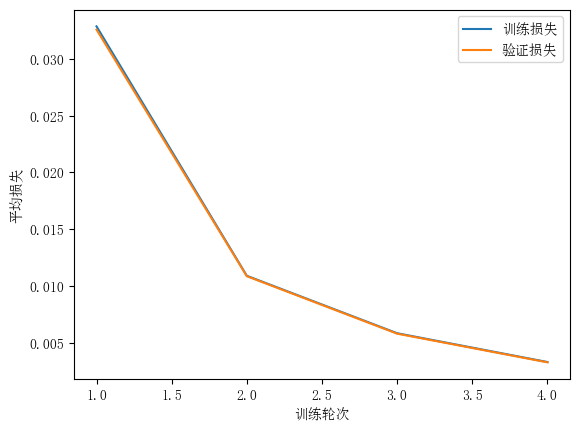

----------------------------------- Epoch: 5/50 -----------------------------------
Batch: 0%, Loss: 0.002531827979886031
Test Loss: 0.0032891549824410828
Batch: 0%, Loss: 0.0036930672383097968
Test Loss: 0.003294084739810857
Batch: 0%, Loss: 0.0026809262775558482
Test Loss: 0.0033036576311207913
Batch: 0%, Loss: 0.0038946128996025266
Test Loss: 0.003272044985946606
Batch: 0%, Loss: 0.0026319852462213787
Test Loss: 0.0032642530946149512
Batch: 0%, Loss: 0.0030676160411684736
Test Loss: 0.00323843703756569
Batch: 0%, Loss: 0.00311994110570401
Test Loss: 0.0032392640586437903
Batch: 0%, Loss: 0.004228000622571945
Test Loss: 0.003204986693234274
Batch: 0%, Loss: 0.003491930476674811
Test Loss: 0.003184637655231893
Batch: 0%, Loss: 0.0029546331299619825
Test Loss: 0.0031774997502675597
Batch: 0%, Loss: 0.0022969772428869184
Test Loss: 0.003138137705682437
Batch: 0%, Loss: 0.002548461072811629
Test Loss: 0.0031938060321635283
Batch: 0%, Loss: 0.002619711084459806
Test Loss: 0.00315107181636

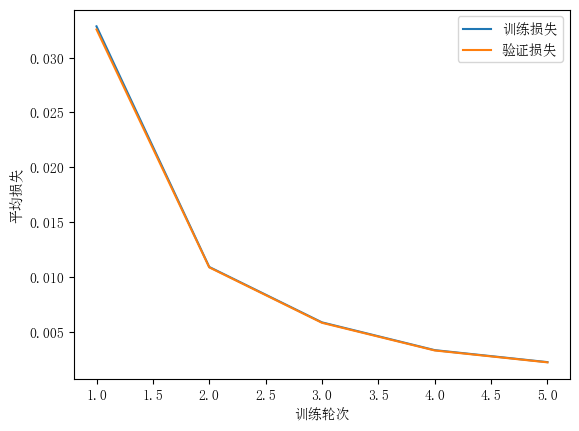

----------------------------------- Epoch: 6/50 -----------------------------------
Batch: 0%, Loss: 0.002426296136361362
Test Loss: 0.0022249656430945
Batch: 0%, Loss: 0.002098772339228772
Test Loss: 0.00223795146499604
Batch: 0%, Loss: 0.0018016710780687031
Test Loss: 0.0022566777229217436
Batch: 0%, Loss: 0.001864886328223384
Test Loss: 0.0021759976929904734
Batch: 0%, Loss: 0.0014949609652078395
Test Loss: 0.002161024138315106
Batch: 0%, Loss: 0.0016985671458508548
Test Loss: 0.0021682771351307474
Batch: 0%, Loss: 0.002036926833258848
Test Loss: 0.002144480805322042
Batch: 0%, Loss: 0.0024586166335692937
Test Loss: 0.0021544584550972153
Batch: 0%, Loss: 0.002124870316547471
Test Loss: 0.002148538890932821
Batch: 0%, Loss: 0.0022063378514446735
Test Loss: 0.0021294288536416284
Batch: 0%, Loss: 0.003312587022654505
Test Loss: 0.002150469119815738
Batch: 0%, Loss: 0.002004049948169696
Test Loss: 0.0022070117209977923
Batch: 0%, Loss: 0.002051055245370288
Test Loss: 0.00216443118657328

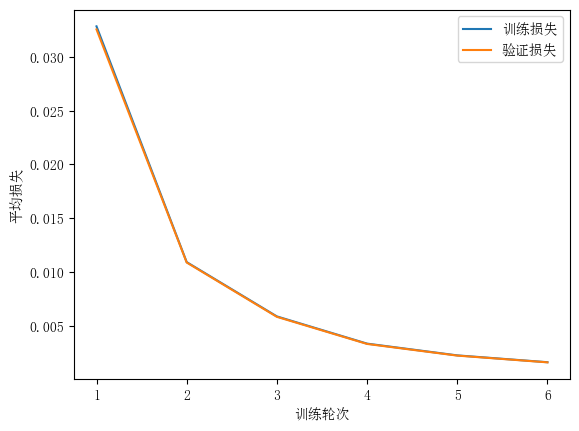

----------------------------------- Epoch: 7/50 -----------------------------------
Batch: 0%, Loss: 0.0012955292719264995
Test Loss: 0.001585115376731735
Batch: 0%, Loss: 0.002179219022164261
Test Loss: 0.00160149705387585
Batch: 0%, Loss: 0.001219697921960345
Test Loss: 0.0016351439645280643
Batch: 0%, Loss: 0.0018545342682867367
Test Loss: 0.0016099586820405543
Batch: 0%, Loss: 0.0013676331781749844
Test Loss: 0.0016003199583385426
Batch: 0%, Loss: 0.0017681949953668387
Test Loss: 0.0015946557783800036
Batch: 0%, Loss: 0.001457672458976483
Test Loss: 0.0016193217152517482
Batch: 0%, Loss: 0.0017213495082020098
Test Loss: 0.001606887926435551
Batch: 0%, Loss: 0.001170146414461636
Test Loss: 0.0015914962012314757
Batch: 0%, Loss: 0.001594887840508842
Test Loss: 0.0015937318934843205
Batch: 0%, Loss: 0.0012088472798960574
Test Loss: 0.001574062927816371
Batch: 0%, Loss: 0.0015775790743894542
Test Loss: 0.0015875563885130214
Batch: 0%, Loss: 0.001181679334437312
Test Loss: 0.00160153309

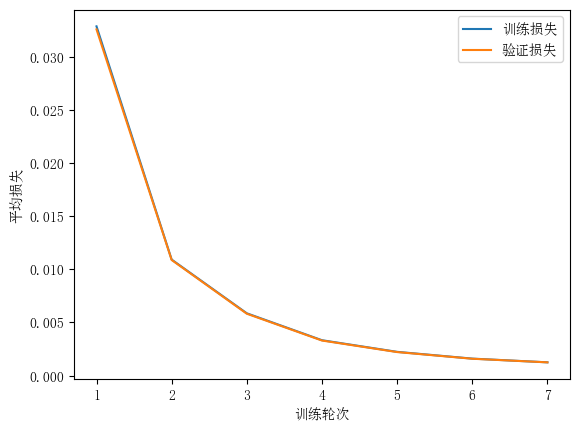

----------------------------------- Epoch: 8/50 -----------------------------------
Batch: 0%, Loss: 0.0019372672148706012
Test Loss: 0.0012317568188195723
Batch: 0%, Loss: 0.0010570683231001595
Test Loss: 0.0012502467154616936
Batch: 0%, Loss: 0.0010464202766116018
Test Loss: 0.0012285498388284397
Batch: 0%, Loss: 0.0013747982122015335
Test Loss: 0.0012607266086001145
Batch: 0%, Loss: 0.0011893991747079836
Test Loss: 0.0012535948113549596
Batch: 0%, Loss: 0.0011914620846067534
Test Loss: 0.0012830065643711487
Batch: 0%, Loss: 0.0015304393531888273
Test Loss: 0.0012107251707906275
Batch: 0%, Loss: 0.0010664405943137134
Test Loss: 0.0012172374939507546
Batch: 0%, Loss: 0.0013113901827466843
Test Loss: 0.0012356278157078832
Batch: 0%, Loss: 0.0010781768904460265
Test Loss: 0.0012422124907615821
Batch: 0%, Loss: 0.0013735176726700576
Test Loss: 0.0012283201512534978
Batch: 0%, Loss: 0.001483262971580406
Test Loss: 0.0013082427956469524
Batch: 0%, Loss: 0.001438420559195889
Test Loss: 0.00

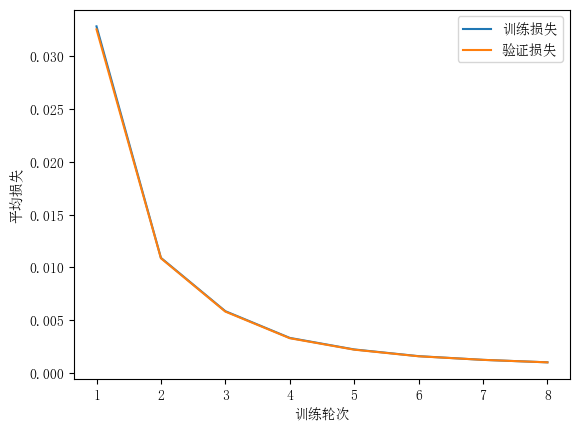

----------------------------------- Epoch: 9/50 -----------------------------------
Batch: 0%, Loss: 0.0008285668217478777
Test Loss: 0.0009992225346677423
Batch: 0%, Loss: 0.0008239005616015584
Test Loss: 0.0010086384021800983
Batch: 0%, Loss: 0.0010716455160461912
Test Loss: 0.0010151350703209864
Batch: 0%, Loss: 0.0010003623632095925
Test Loss: 0.0009817807258151378
Batch: 0%, Loss: 0.001263787307021691
Test Loss: 0.0010175687824047306
Batch: 0%, Loss: 0.0008580020354231201
Test Loss: 0.000998420545845227
Batch: 0%, Loss: 0.0007925390480165629
Test Loss: 0.0009908350934918727
Batch: 0%, Loss: 0.0010001670396134347
Test Loss: 0.0009780095828756546
Batch: 0%, Loss: 0.0008604969131013283
Test Loss: 0.000985465430159163
Batch: 0%, Loss: 0.0012661763375799986
Test Loss: 0.0009740068155591786
Batch: 0%, Loss: 0.0007136684862707
Test Loss: 0.0010304210323724772
Batch: 0%, Loss: 0.0006968626858076913
Test Loss: 0.0009726959470565269
Batch: 0%, Loss: 0.0010587689869693277
Test Loss: 0.000985

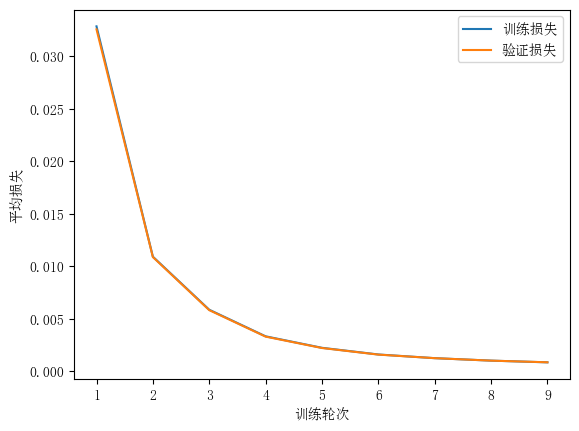

----------------------------------- Epoch: 10/50 -----------------------------------
Batch: 0%, Loss: 0.0006882771245205667
Test Loss: 0.0008524814512538764
Batch: 0%, Loss: 0.0008584914500409613
Test Loss: 0.0008349413451392216
Batch: 0%, Loss: 0.0005750236885357137
Test Loss: 0.0008083633462220358
Batch: 0%, Loss: 0.0011704796896021682
Test Loss: 0.0008171625178078585
Batch: 0%, Loss: 0.0008934966686156065
Test Loss: 0.000807271323333837
Batch: 0%, Loss: 0.0006963555467627331
Test Loss: 0.0008213766080129283
Batch: 0%, Loss: 0.0008930892263694533
Test Loss: 0.0008052239126567067
Batch: 0%, Loss: 0.0006475865866422323
Test Loss: 0.0007998174962701738
Batch: 0%, Loss: 0.00071925488267538
Test Loss: 0.0008184577433388933
Batch: 0%, Loss: 0.0012414903336439834
Test Loss: 0.0008056370192451606
Batch: 0%, Loss: 0.0009033187799983673
Test Loss: 0.0008141223957858603
Batch: 0%, Loss: 0.0011309308676721854
Test Loss: 0.0008009262625933565
Batch: 0%, Loss: 0.0006715013490341551
Test Loss: 0.00

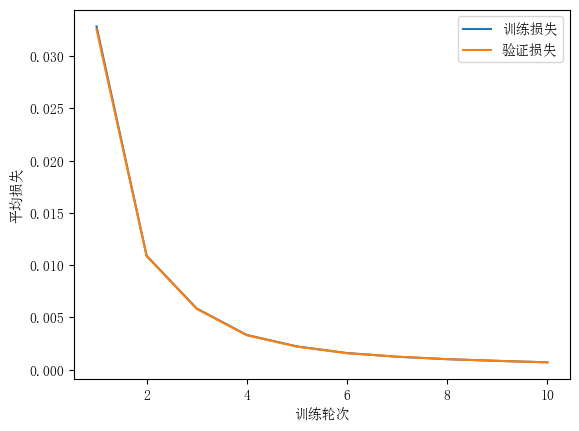

----------------------------------- Epoch: 11/50 -----------------------------------
Batch: 0%, Loss: 0.0005853597851355366
Test Loss: 0.0007090644177015513
Batch: 0%, Loss: 0.0007287155964856841
Test Loss: 0.0006969513761405333
Batch: 0%, Loss: 0.0005395990851154032
Test Loss: 0.0006837051381460306
Batch: 0%, Loss: 0.0005419154689826254
Test Loss: 0.000723699499458507
Batch: 0%, Loss: 0.0005438580905935861
Test Loss: 0.0006924978944816184
Batch: 0%, Loss: 0.0006870880023250278
Test Loss: 0.0006751701128843401
Batch: 0%, Loss: 0.00048816538384545167
Test Loss: 0.00069989965717399
Batch: 0%, Loss: 0.0008043381000338418
Test Loss: 0.0006895463549520982
Batch: 0%, Loss: 0.000704029653298423
Test Loss: 0.0006653172336785015
Batch: 0%, Loss: 0.0007894006177911509
Test Loss: 0.0006684291513412443
Batch: 0%, Loss: 0.0005837164721378822
Test Loss: 0.0006784609882559259
Batch: 0%, Loss: 0.0005931918811130167
Test Loss: 0.0006693281083464885
Batch: 0%, Loss: 0.0007020787443950612
Test Loss: 0.00

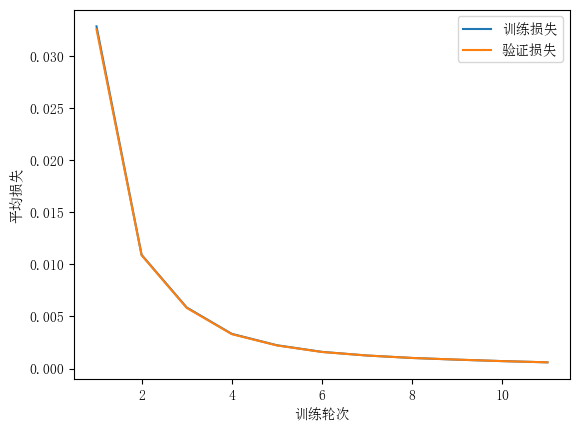

----------------------------------- Epoch: 12/50 -----------------------------------
Batch: 0%, Loss: 0.0007138423204828868
Test Loss: 0.0006002509907118368
Batch: 0%, Loss: 0.0007424004518103024
Test Loss: 0.000601160180050818
Batch: 0%, Loss: 0.0005839586315356611
Test Loss: 0.0005773269976712804
Batch: 0%, Loss: 0.0004978744136252784
Test Loss: 0.0005811925875983112
Batch: 0%, Loss: 0.0004418307418618586
Test Loss: 0.0005962071341479532
Batch: 0%, Loss: 0.0005269138711707932
Test Loss: 0.0005821069479899505
Batch: 0%, Loss: 0.0005611241122351688
Test Loss: 0.000573779868679897
Batch: 0%, Loss: 0.0011449428720134598
Test Loss: 0.0005879224893812394
Batch: 0%, Loss: 0.0008945768775545614
Test Loss: 0.0005890110202982044
Batch: 0%, Loss: 0.0005209484791491813
Test Loss: 0.0006178104123790374
Batch: 0%, Loss: 0.0005206536526101055
Test Loss: 0.0005927971484970112
Batch: 0%, Loss: 0.0008977733952924264
Test Loss: 0.0005974473135665478
Batch: 0%, Loss: 0.0007880190982351651
Test Loss: 0.0

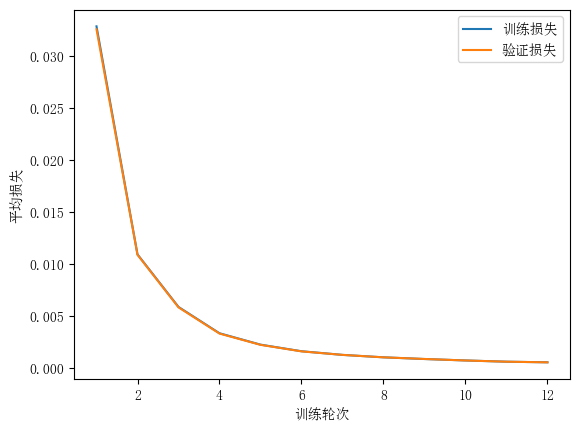

----------------------------------- Epoch: 13/50 -----------------------------------
Batch: 0%, Loss: 0.0007321176230602202
Test Loss: 0.0005253035892208176
Batch: 0%, Loss: 0.0009921170786800226
Test Loss: 0.0005160406830530732
Batch: 0%, Loss: 0.0005299072593915465
Test Loss: 0.0005093607650738379
Batch: 0%, Loss: 0.0005164535944921461
Test Loss: 0.0005075335200476399
Batch: 0%, Loss: 0.000674790819131971
Test Loss: 0.0005368922450916685
Batch: 0%, Loss: 0.00050978747974968
Test Loss: 0.0005242524554225429
Batch: 0%, Loss: 0.00044924461006183494
Test Loss: 0.000538222960961837
Batch: 0%, Loss: 0.0004099808515305972
Test Loss: 0.0005539879667592149
Batch: 0%, Loss: 0.0003903081905254252
Test Loss: 0.0005237982214237618
Batch: 0%, Loss: 0.0005225091167198971
Test Loss: 0.000521682390369533
Batch: 0%, Loss: 0.00045548908249218653
Test Loss: 0.0005217247017427896
Batch: 0%, Loss: 0.0005509914666825686
Test Loss: 0.0005149888998220793
Batch: 0%, Loss: 0.0004255592008674045
Test Loss: 0.00

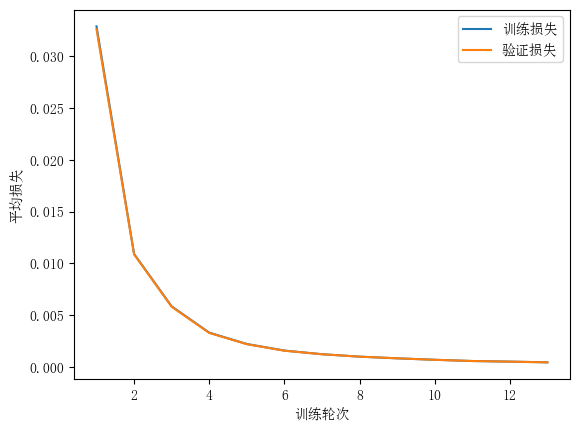

----------------------------------- Epoch: 14/50 -----------------------------------
Batch: 0%, Loss: 0.0007111318689122101
Test Loss: 0.00047952664812861575
Batch: 0%, Loss: 0.0005750436223437374
Test Loss: 0.0004623846257009083
Batch: 0%, Loss: 0.00046865207014955767
Test Loss: 0.00045660092589782395
Batch: 0%, Loss: 0.00038383605113559064
Test Loss: 0.0004602907172073459
Batch: 0%, Loss: 0.00038488909337033216
Test Loss: 0.0004577245364415545
Batch: 0%, Loss: 0.00040391417523798955
Test Loss: 0.0004612037274833802
Batch: 0%, Loss: 0.00045812171097065873
Test Loss: 0.0004753886665285276
Batch: 0%, Loss: 0.0005421579417269767
Test Loss: 0.0004735614034784952
Batch: 0%, Loss: 0.0004556142297866834
Test Loss: 0.0005130655731747521
Batch: 0%, Loss: 0.0005400456910671796
Test Loss: 0.0004680362739937432
Batch: 0%, Loss: 0.0008666279153584369
Test Loss: 0.00044182996336114213
Batch: 0%, Loss: 0.0004836588660264078
Test Loss: 0.00045412168473554673
Batch: 0%, Loss: 0.0005429514091093185
Tes

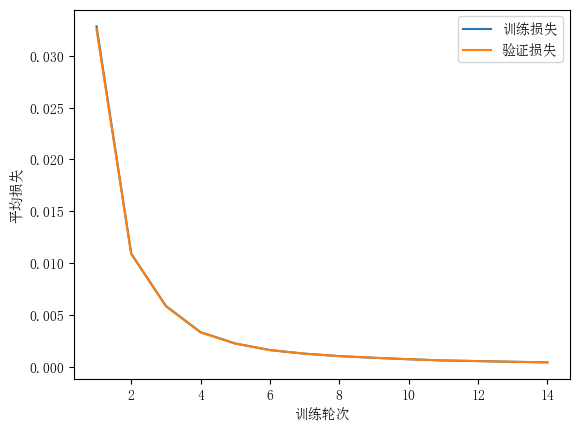

----------------------------------- Epoch: 15/50 -----------------------------------
Batch: 0%, Loss: 0.00031554138422468876
Test Loss: 0.00041986737342989636
Batch: 0%, Loss: 0.0003314380088707226
Test Loss: 0.00041916435591251634
Batch: 0%, Loss: 0.0003145542876146869
Test Loss: 0.00041758261116254993
Batch: 0%, Loss: 0.0004404786997659625
Test Loss: 0.00042433532279084356
Batch: 0%, Loss: 0.00043897456695528785
Test Loss: 0.0004770189776715001
Batch: 0%, Loss: 0.0004443819715247779
Test Loss: 0.0004092729721233135
Batch: 0%, Loss: 0.0005465182458097316
Test Loss: 0.0004205145198852352
Batch: 0%, Loss: 0.0005156593983780759
Test Loss: 0.0004206928724164531
Batch: 0%, Loss: 0.00029274439102685814
Test Loss: 0.00041899032375948054
Batch: 0%, Loss: 0.00044763646400485847
Test Loss: 0.0004012427806790012
Batch: 0%, Loss: 0.0005935065812702918
Test Loss: 0.0004037191875229491
Batch: 0%, Loss: 0.00031031356011437247
Test Loss: 0.0004116009706115554
Batch: 0%, Loss: 0.0003294089801224945
Te

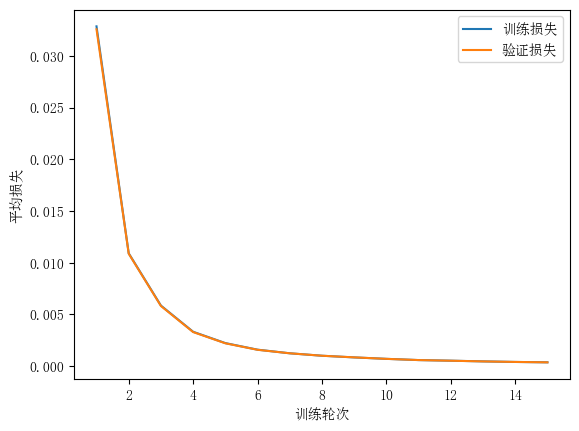

----------------------------------- Epoch: 16/50 -----------------------------------
Batch: 0%, Loss: 0.0004202020684402692
Test Loss: 0.00037156332085418013
Batch: 0%, Loss: 0.0003379134099096482
Test Loss: 0.00040493949444882145
Batch: 0%, Loss: 0.0005402155379454042
Test Loss: 0.0003696139153833422
Batch: 0%, Loss: 0.00035532852696699746
Test Loss: 0.0003644064909955128
Batch: 0%, Loss: 0.000477004425620341
Test Loss: 0.00036220656451441986
Batch: 0%, Loss: 0.00037310526715898795
Test Loss: 0.00036788776061736565
Batch: 0%, Loss: 0.00027994243311515207
Test Loss: 0.0003663836561921241
Batch: 0%, Loss: 0.00030836795624289567
Test Loss: 0.000359728309967419
Batch: 0%, Loss: 0.0005153171313454943
Test Loss: 0.0003559303109098703
Batch: 0%, Loss: 0.0005291749284656374
Test Loss: 0.0003573901091400314
Batch: 0%, Loss: 0.0006778823450594049
Test Loss: 0.0003644019089088816
Batch: 0%, Loss: 0.0006678837266847915
Test Loss: 0.0003769359338877128
Batch: 0%, Loss: 0.0005655064114792843
Test L

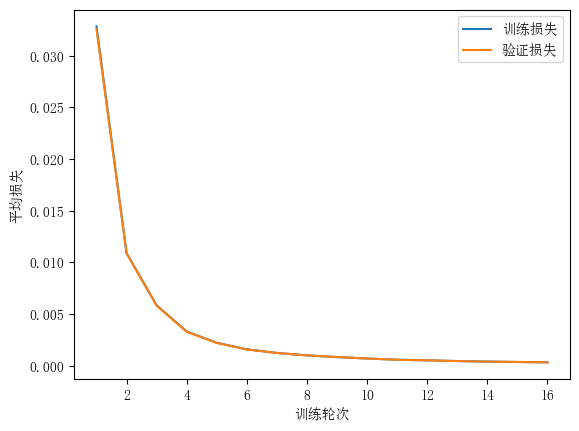

----------------------------------- Epoch: 17/50 -----------------------------------
Batch: 0%, Loss: 0.00023618118975486413
Test Loss: 0.0003413576008237746
Batch: 0%, Loss: 0.0004090957828339736
Test Loss: 0.0003495476798645366
Batch: 0%, Loss: 0.000316953877751099
Test Loss: 0.0003662023585454773
Batch: 0%, Loss: 0.0002770315595547177
Test Loss: 0.0003678343932058358
Batch: 0%, Loss: 0.0003271953250794317
Test Loss: 0.00035457326860907504
Batch: 0%, Loss: 0.0002755059908651017
Test Loss: 0.0003289415985665651
Batch: 0%, Loss: 0.0002853609631920077
Test Loss: 0.0003308773564995747
Batch: 0%, Loss: 0.00023377974746387084
Test Loss: 0.0003405099911049068
Batch: 0%, Loss: 0.0003901159563201299
Test Loss: 0.00034259269165908685
Batch: 0%, Loss: 0.0004959665194646192
Test Loss: 0.00035196765272851253
Batch: 0%, Loss: 0.0003211302650133168
Test Loss: 0.00035937935527017456
Batch: 0%, Loss: 0.0003268955025401431
Test Loss: 0.0003497738908653454
Batch: 0%, Loss: 0.00020188871572162647
Test L

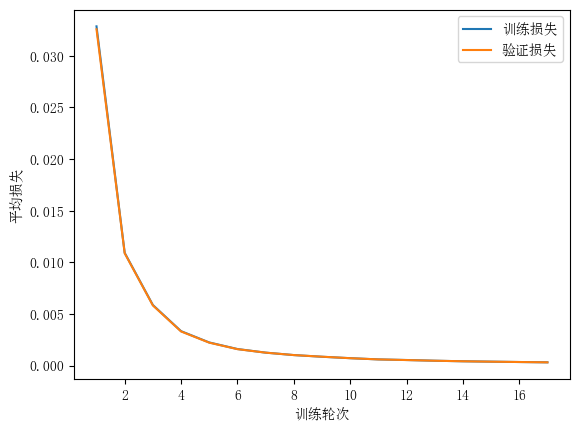

----------------------------------- Epoch: 18/50 -----------------------------------
Batch: 0%, Loss: 0.0005100857094936645
Test Loss: 0.0003190979713451391
Batch: 0%, Loss: 0.00030354633655592595
Test Loss: 0.0003140942207873612
Batch: 0%, Loss: 0.0002657027499860462
Test Loss: 0.0003060807210540235
Batch: 0%, Loss: 0.0001727206311498663
Test Loss: 0.00031226264181578476
Batch: 0%, Loss: 0.0004656532431110798
Test Loss: 0.00032398442432227364
Batch: 0%, Loss: 0.00033429920410742284
Test Loss: 0.0003140821681988408
Batch: 0%, Loss: 0.0003864148527037108
Test Loss: 0.0003030056453422768
Batch: 0%, Loss: 0.00020780729616150465
Test Loss: 0.0003127097627932871
Batch: 0%, Loss: 0.0003590470077338526
Test Loss: 0.0003123805174350851
Batch: 0%, Loss: 0.0004139866851199566
Test Loss: 0.000339505838871602
Batch: 0%, Loss: 0.0002785948268359269
Test Loss: 0.0003106752680231288
Batch: 0%, Loss: 0.00040592039228647743
Test Loss: 0.0003186841667918978
Batch: 0%, Loss: 0.00035064751203284347
Test L

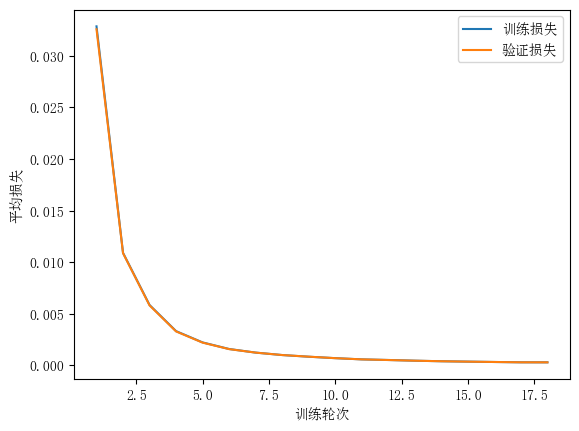

----------------------------------- Epoch: 19/50 -----------------------------------
Batch: 0%, Loss: 0.0003652143767617775
Test Loss: 0.00029335143201325375
Batch: 0%, Loss: 0.0003651566158885594
Test Loss: 0.0003001063181707444
Batch: 0%, Loss: 0.0002913489113896801
Test Loss: 0.0002997338890055918
Batch: 0%, Loss: 0.0003476295198355638
Test Loss: 0.0002815378426322927
Batch: 0%, Loss: 0.0002414891972334047
Test Loss: 0.0002820152850546624
Batch: 0%, Loss: 0.0002104071930440622
Test Loss: 0.00029595022961791806
Batch: 0%, Loss: 0.00017160889786048552
Test Loss: 0.00029532107842115653
Batch: 0%, Loss: 0.00033234953656213686
Test Loss: 0.000287159064356591
Batch: 0%, Loss: 0.00020667642964956
Test Loss: 0.000294697760965104
Batch: 0%, Loss: 0.0002707284537738097
Test Loss: 0.0003159161353566649
Batch: 0%, Loss: 0.00032873414891440805
Test Loss: 0.00028385987488743205
Batch: 0%, Loss: 0.00030764746503926396
Test Loss: 0.00029055824078515826
Batch: 0%, Loss: 0.0005134064350139086
Test Lo

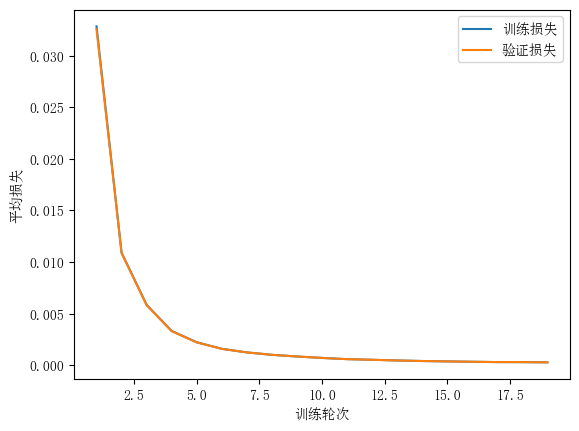

----------------------------------- Epoch: 20/50 -----------------------------------
Batch: 0%, Loss: 0.0003179838767321498
Test Loss: 0.0003004072348488025
Batch: 0%, Loss: 0.0003576904145330312
Test Loss: 0.0002791878003184697
Batch: 0%, Loss: 0.00021521967420285197
Test Loss: 0.0002668351205789126
Batch: 0%, Loss: 0.00024110585741843956
Test Loss: 0.0002875206767274295
Batch: 0%, Loss: 0.00019387750704025666
Test Loss: 0.00026142497792610935
Batch: 0%, Loss: 0.0003113179048880065
Test Loss: 0.00028634725107262146
Batch: 0%, Loss: 0.00021653554357295562
Test Loss: 0.00028084295520640465
Batch: 0%, Loss: 0.00035987479351349356
Test Loss: 0.00027961177514959087
Batch: 0%, Loss: 0.00022057779817795031
Test Loss: 0.0002851502277982459
Batch: 0%, Loss: 0.0003403621738781879
Test Loss: 0.00027834488143698983
Batch: 0%, Loss: 0.00023597509901228237
Test Loss: 0.00026255280505916754
Batch: 0%, Loss: 0.0002148979869033483
Test Loss: 0.0002700814861406879
Batch: 0%, Loss: 0.0002323387649209369

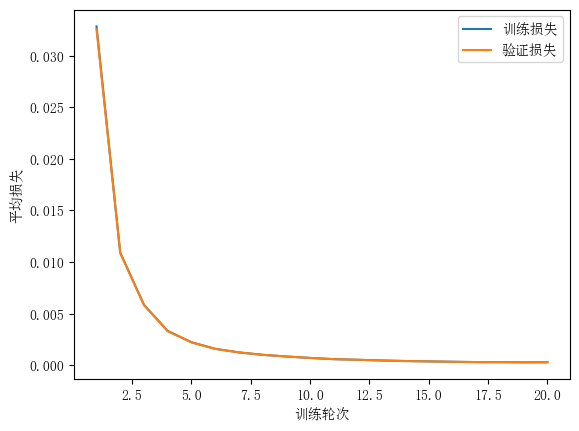

----------------------------------- Epoch: 21/50 -----------------------------------
Batch: 0%, Loss: 0.0003757824728052664
Test Loss: 0.000271428272361824
Batch: 0%, Loss: 0.00021263896379699313
Test Loss: 0.0002446910669622844
Batch: 0%, Loss: 0.0002052507906541597
Test Loss: 0.0002453039367750926
Batch: 0%, Loss: 0.00028805866162984385
Test Loss: 0.0002720687214640596
Batch: 0%, Loss: 0.00020079829024908277
Test Loss: 0.0002660668219020389
Batch: 0%, Loss: 0.00023260657079419438
Test Loss: 0.00025474468515618976
Batch: 0%, Loss: 0.0003707103416624188
Test Loss: 0.00026167234676252295
Batch: 0%, Loss: 0.00028084438803444354
Test Loss: 0.0002498257698034117
Batch: 0%, Loss: 0.0002970646252315255
Test Loss: 0.0002517533016675093
Batch: 0%, Loss: 0.0002600547910652688
Test Loss: 0.00025549170737001494
Batch: 0%, Loss: 0.00030238630232068273
Test Loss: 0.00024738121756499295
Batch: 0%, Loss: 0.00041276556970292703
Test Loss: 0.00025610116391678174
Batch: 0%, Loss: 0.0001822366300021008
T

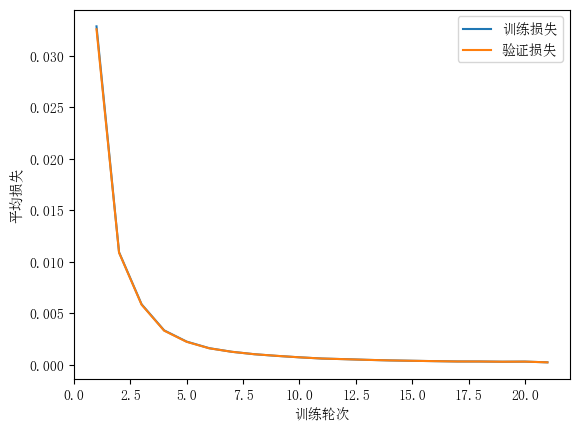

----------------------------------- Epoch: 22/50 -----------------------------------
Batch: 0%, Loss: 0.00013508148635152023
Test Loss: 0.00022431593743744489
Batch: 0%, Loss: 0.00026398814942504134
Test Loss: 0.0002283229172910231
Batch: 0%, Loss: 0.0002313293112727612
Test Loss: 0.00022174993974473047
Batch: 0%, Loss: 0.00030506528313301517
Test Loss: 0.00022994257012079708
Batch: 0%, Loss: 0.00020336501983949891
Test Loss: 0.0002286511864076344
Batch: 0%, Loss: 0.000330939252469124
Test Loss: 0.00022449799608916017
Batch: 0%, Loss: 0.00016892298710700646
Test Loss: 0.00024452723599200575
Batch: 0%, Loss: 0.00026383280461150246
Test Loss: 0.0002605324299904898
Batch: 0%, Loss: 0.0002194205264352709
Test Loss: 0.00025273948209542644
Batch: 0%, Loss: 0.00026969880058578914
Test Loss: 0.00023865300008857983
Batch: 0%, Loss: 0.0003872711612953109
Test Loss: 0.00023609578096589568
Batch: 0%, Loss: 0.00024088783119858507
Test Loss: 0.00022908101250096786
Batch: 0%, Loss: 0.0005469582788323

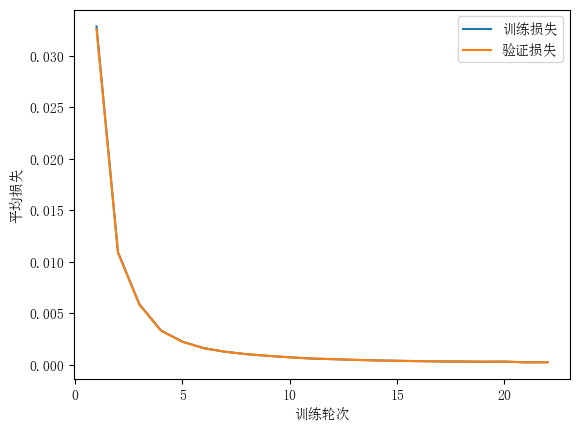

----------------------------------- Epoch: 23/50 -----------------------------------
Batch: 0%, Loss: 0.00024649348986951987
Test Loss: 0.0002312738619151297
Batch: 0%, Loss: 0.000392595577305288
Test Loss: 0.00022727866505262487
Batch: 0%, Loss: 0.00034684713095648476
Test Loss: 0.0002190411642177552
Batch: 0%, Loss: 0.00020665047603301225
Test Loss: 0.00022255125185812277
Batch: 0%, Loss: 0.00013978847939456114
Test Loss: 0.0002313826245752349
Batch: 0%, Loss: 0.00018187530085313395
Test Loss: 0.00022125110654409839
Batch: 0%, Loss: 0.0001397075142691905
Test Loss: 0.00021400903891599153
Batch: 0%, Loss: 0.0002514011461632594
Test Loss: 0.00021457341317966487
Batch: 0%, Loss: 0.00022611758069856808
Test Loss: 0.00023635600767194198
Batch: 0%, Loss: 0.00017039423527160966
Test Loss: 0.00022982305833137994
Batch: 0%, Loss: 0.00020003840047700256
Test Loss: 0.00021489974459407366
Batch: 0%, Loss: 0.0003833008674099315
Test Loss: 0.00021440009496344624
Batch: 0%, Loss: 0.0002087852960932

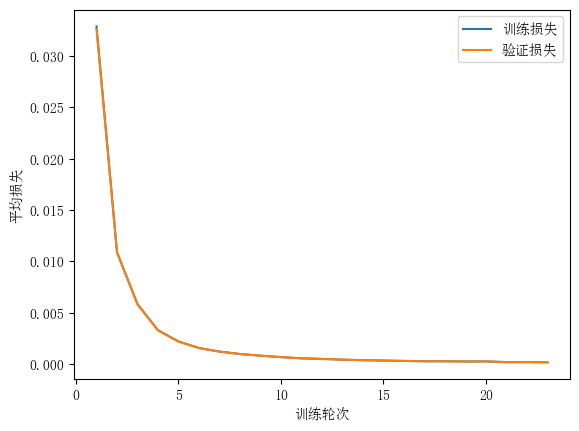

----------------------------------- Epoch: 24/50 -----------------------------------
Batch: 0%, Loss: 0.0001973761128378314
Test Loss: 0.00020108955471437773
Batch: 0%, Loss: 0.0001936352510237824
Test Loss: 0.0002072393966105241
Batch: 0%, Loss: 0.0002488032550928744
Test Loss: 0.00020695195217517075
Batch: 0%, Loss: 0.00017689738961652155
Test Loss: 0.0002044488083908673
Batch: 0%, Loss: 0.00014276431260316265
Test Loss: 0.00020376826780832524
Batch: 0%, Loss: 0.00027831685419075765
Test Loss: 0.00020290011096217632
Batch: 0%, Loss: 0.00017276932421034244
Test Loss: 0.00020454334062676113
Batch: 0%, Loss: 0.00013992360131412409
Test Loss: 0.00020564951201889717
Batch: 0%, Loss: 0.00024855031861463
Test Loss: 0.0002082607843321165
Batch: 0%, Loss: 0.00014559494453905017
Test Loss: 0.00020390670768967293
Batch: 0%, Loss: 0.0003684324375171721
Test Loss: 0.0002088215685373599
Batch: 0%, Loss: 0.0002131796322632118
Test Loss: 0.00022022886816980966
Batch: 0%, Loss: 0.00019000037735604673

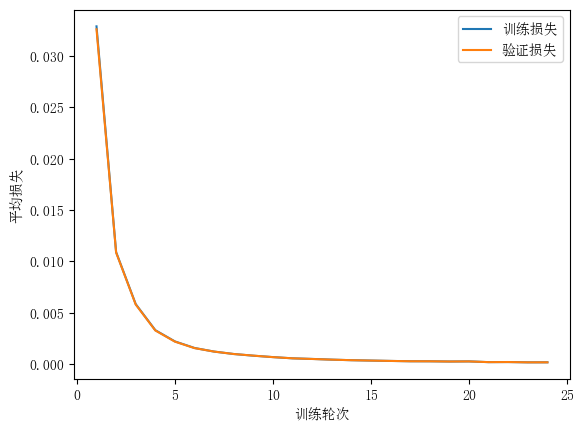

----------------------------------- Epoch: 25/50 -----------------------------------
Batch: 0%, Loss: 0.0001708990108278455
Test Loss: 0.00020865912616058158
Batch: 0%, Loss: 0.0002458025426135505
Test Loss: 0.00019282157039003978
Batch: 0%, Loss: 0.0001828461888917992
Test Loss: 0.00020709063724777153
Batch: 0%, Loss: 0.00018072931698155114
Test Loss: 0.00020533784114293326
Batch: 0%, Loss: 0.00014282431278772728
Test Loss: 0.00020206872404080918
Batch: 0%, Loss: 0.0002328951924827679
Test Loss: 0.00019483101187106844
Batch: 0%, Loss: 0.00016462911963652674
Test Loss: 0.00019350252620392512
Batch: 0%, Loss: 0.00017596037810258477
Test Loss: 0.00020592585511053303
Batch: 0%, Loss: 0.00016026257631557276
Test Loss: 0.00020304720095681158
Batch: 0%, Loss: 0.0002627878568596318
Test Loss: 0.00020139033636106153
Batch: 0%, Loss: 0.0001855214951249642
Test Loss: 0.0002001250625284647
Batch: 0%, Loss: 0.0002013895945805176
Test Loss: 0.00019059316876454273
Batch: 0%, Loss: 0.0001954178308899

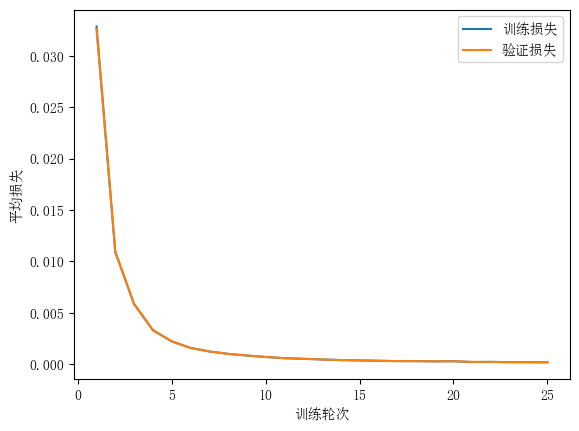

----------------------------------- Epoch: 26/50 -----------------------------------
Batch: 0%, Loss: 0.00016378975167845205
Test Loss: 0.0001854929732827305
Batch: 0%, Loss: 0.00013426173084589576
Test Loss: 0.0001844384767993966
Batch: 0%, Loss: 0.00023662683099397104
Test Loss: 0.00018381808601102047
Batch: 0%, Loss: 0.00015986536865821976
Test Loss: 0.0001822579489000777
Batch: 0%, Loss: 0.00021541978103454458
Test Loss: 0.00019785050017461468
Batch: 0%, Loss: 0.00018007019196824203
Test Loss: 0.00018394232022206141
Batch: 0%, Loss: 0.0001250240719087417
Test Loss: 0.00018433191911575335
Batch: 0%, Loss: 0.00024042202585613533
Test Loss: 0.000187412244183445
Batch: 0%, Loss: 0.00021177543338082584
Test Loss: 0.0001961049107667262
Batch: 0%, Loss: 0.00015763215807429427
Test Loss: 0.00018956303317307644
Batch: 0%, Loss: 0.00013206722842790033
Test Loss: 0.00019225133344640655
Batch: 0%, Loss: 0.00018382718429200607
Test Loss: 0.00018220060176720089
Batch: 0%, Loss: 0.000287659719999

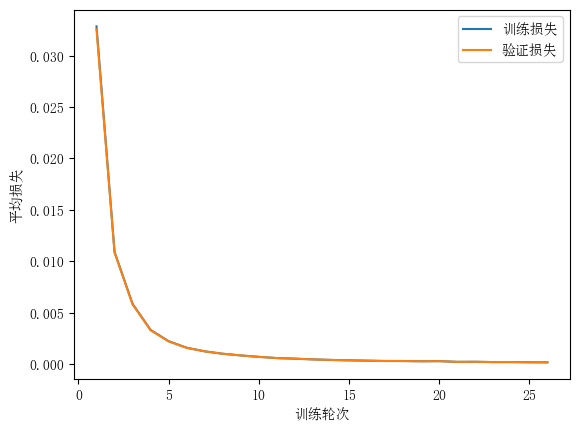

----------------------------------- Epoch: 27/50 -----------------------------------
Batch: 0%, Loss: 0.0001590559446850404
Test Loss: 0.00018750001081432367
Batch: 0%, Loss: 0.00015460299986488842
Test Loss: 0.00019435095060215847
Batch: 0%, Loss: 0.00017026600471301405
Test Loss: 0.00017968409629728115
Batch: 0%, Loss: 0.0001413817670710159
Test Loss: 0.0001768152643868104
Batch: 0%, Loss: 0.00018487279423917832
Test Loss: 0.00017949956363925342
Batch: 0%, Loss: 0.00020600718655015474
Test Loss: 0.00018047788053645103
Batch: 0%, Loss: 0.00017465605175581288
Test Loss: 0.00018306618684371846
Batch: 0%, Loss: 0.00016582280906042238
Test Loss: 0.0001750239875621154
Batch: 0%, Loss: 0.00023780181629974207
Test Loss: 0.00017344791927201286
Batch: 0%, Loss: 0.00027042025727399806
Test Loss: 0.00017434323250085392
Batch: 0%, Loss: 0.0002084171929424466
Test Loss: 0.00017693217749912388
Batch: 0%, Loss: 0.00012109985369099874
Test Loss: 0.0001753603387098818
Batch: 0%, Loss: 0.00019322437669

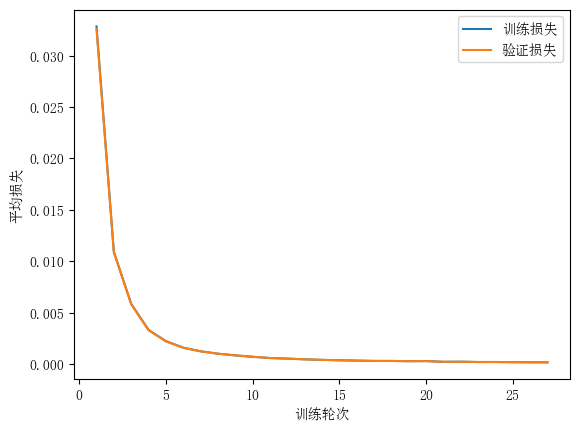

----------------------------------- Epoch: 28/50 -----------------------------------
Batch: 0%, Loss: 0.00014221640089681555
Test Loss: 0.00017684427896943355
Batch: 0%, Loss: 0.0001731835739277321
Test Loss: 0.00017682774602311297
Batch: 0%, Loss: 0.0001646690647057937
Test Loss: 0.00016705788054925997
Batch: 0%, Loss: 0.0001506920057272509
Test Loss: 0.00016998702422389386
Batch: 0%, Loss: 0.00010959960556042744
Test Loss: 0.00016966105524117458
Batch: 0%, Loss: 0.00010356108055785204
Test Loss: 0.0001672263185154346
Batch: 0%, Loss: 0.00018267453680570695
Test Loss: 0.00016334296404753242
Batch: 0%, Loss: 0.0001501201689998794
Test Loss: 0.00016530967575904324
Batch: 0%, Loss: 0.00028471357536599603
Test Loss: 0.00018922340185287137
Batch: 0%, Loss: 0.00012439753639601107
Test Loss: 0.00017326431590633306
Batch: 0%, Loss: 0.00013307799652400985
Test Loss: 0.00016618512919470223
Batch: 0%, Loss: 0.00024108289920726235
Test Loss: 0.0001602325227312882
Batch: 0%, Loss: 0.00022189162706

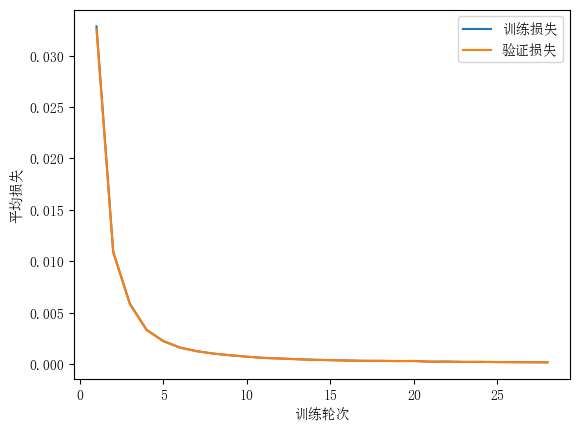

----------------------------------- Epoch: 29/50 -----------------------------------
Batch: 0%, Loss: 0.00016811879756603484
Test Loss: 0.00017633358416954432
Batch: 0%, Loss: 0.00021390445145247564
Test Loss: 0.00018752584495023363
Batch: 0%, Loss: 0.00026176984220603296
Test Loss: 0.00019108144846321067
Batch: 0%, Loss: 0.00016999651836216697
Test Loss: 0.00019182727842044527
Batch: 0%, Loss: 0.00012378551651599809
Test Loss: 0.00015895773843765433
Batch: 0%, Loss: 0.00015972086226669822
Test Loss: 0.0001595792657762872
Batch: 0%, Loss: 0.0002478301520340334
Test Loss: 0.00016004168354588513
Batch: 0%, Loss: 0.00015335365856470308
Test Loss: 0.00015937635682630196
Batch: 0%, Loss: 0.00017192448932509087
Test Loss: 0.00016428728556308028
Batch: 0%, Loss: 0.00016397140190638567
Test Loss: 0.00016184662636059603
Batch: 0%, Loss: 0.000250312887329708
Test Loss: 0.00018292285088687452
Batch: 0%, Loss: 0.0001436915070216136
Test Loss: 0.00016152267383407547
Batch: 0%, Loss: 0.0001361907713

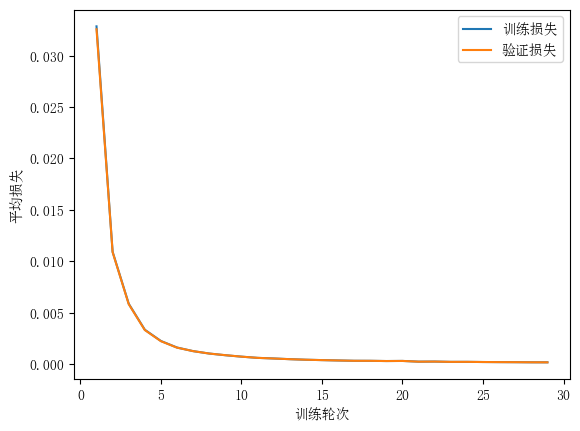

----------------------------------- Epoch: 30/50 -----------------------------------
Batch: 0%, Loss: 0.000149890560264265
Test Loss: 0.00017282031206054729
Batch: 0%, Loss: 0.00011691955374502501
Test Loss: 0.00015473701316449302
Batch: 0%, Loss: 0.000149876521749139
Test Loss: 0.00015354070282671533
Batch: 0%, Loss: 0.00015250438078412442
Test Loss: 0.00015338549550729757
Batch: 0%, Loss: 0.0001247776087427848
Test Loss: 0.000159996884537914
Batch: 0%, Loss: 0.00013636268444779302
Test Loss: 0.00015178117312905217
Batch: 0%, Loss: 0.00019949082006380216
Test Loss: 0.00015089782782801717
Batch: 0%, Loss: 0.00022694161983484326
Test Loss: 0.00015242814415030307
Batch: 0%, Loss: 0.00015631979959127145
Test Loss: 0.00017812716364202036
Batch: 0%, Loss: 0.00015290336112471699
Test Loss: 0.0001603702398586239
Batch: 0%, Loss: 0.00012758596210050787
Test Loss: 0.00016253939080913395
Batch: 0%, Loss: 0.00013975906751898624
Test Loss: 0.00016355922488521654
Batch: 0%, Loss: 0.0002248554636239

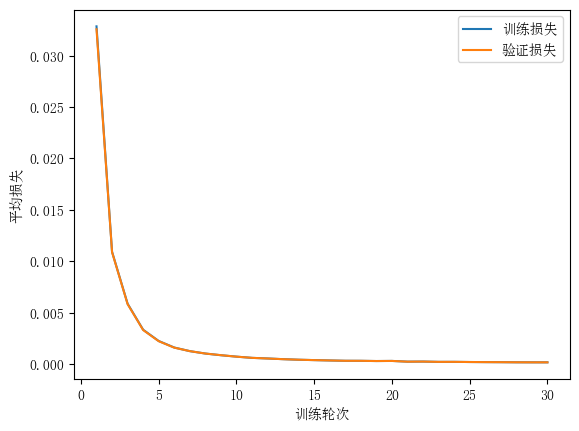

----------------------------------- Epoch: 31/50 -----------------------------------
Batch: 0%, Loss: 0.00016314351414411
Test Loss: 0.00017609865946005803
Batch: 0%, Loss: 7.375359741543194e-05
Test Loss: 0.00015422865603621376
Batch: 0%, Loss: 0.00014326623855828946
Test Loss: 0.00015028954011416762
Batch: 0%, Loss: 0.00011927032058685875
Test Loss: 0.00014485814567808273
Batch: 0%, Loss: 0.00013822312689723413
Test Loss: 0.00014365932860970545
Batch: 0%, Loss: 0.00016916026638126832
Test Loss: 0.00014465219363520135
Batch: 0%, Loss: 8.171837938759879e-05
Test Loss: 0.0001456836987521982
Batch: 0%, Loss: 0.00012731802514807879
Test Loss: 0.000147715190327357
Batch: 0%, Loss: 0.0001671517787561698
Test Loss: 0.0001447069243458059
Batch: 0%, Loss: 0.00013920764661630723
Test Loss: 0.0001443569377263539
Batch: 0%, Loss: 0.00011241580071630779
Test Loss: 0.00015523773115843031
Batch: 0%, Loss: 0.00010830615385946014
Test Loss: 0.0001590180507329661
Batch: 0%, Loss: 0.00012934793847979125

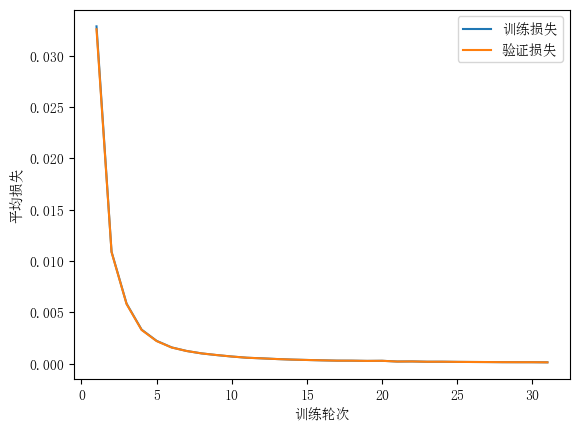

----------------------------------- Epoch: 32/50 -----------------------------------
Batch: 0%, Loss: 0.0002103747697812998
Test Loss: 0.000142959601179427
Batch: 0%, Loss: 0.0001621322920484649
Test Loss: 0.00014879539086789118
Batch: 0%, Loss: 9.135861024040011e-05
Test Loss: 0.00014284539475395886
Batch: 0%, Loss: 0.00014587379285013044
Test Loss: 0.0001389934277862956
Batch: 0%, Loss: 0.00016506855755455313
Test Loss: 0.00014216287644750332
Batch: 0%, Loss: 0.0002150864094498687
Test Loss: 0.00014762239825004368
Batch: 0%, Loss: 0.00011304396516564201
Test Loss: 0.00014664157558023965
Batch: 0%, Loss: 0.00014523800798320956
Test Loss: 0.00014280952863717354
Batch: 0%, Loss: 0.00015805288714067586
Test Loss: 0.00014132433513318077
Batch: 0%, Loss: 0.00011717972710702418
Test Loss: 0.0001421655507162334
Batch: 0%, Loss: 0.00010270317692703126
Test Loss: 0.00014567893564624342
Batch: 0%, Loss: 0.00015931913695728045
Test Loss: 0.00015551110678383898
Batch: 0%, Loss: 0.0001492879452813

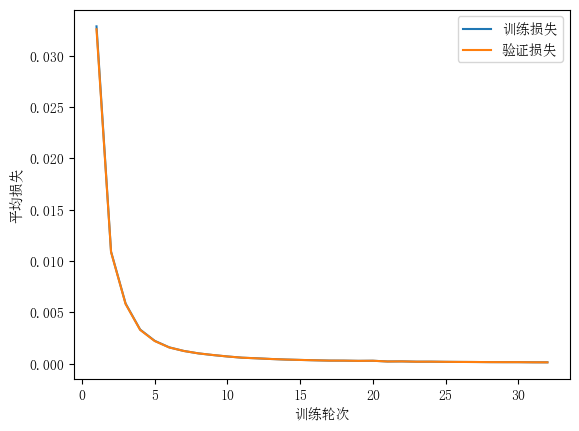

----------------------------------- Epoch: 33/50 -----------------------------------
Batch: 0%, Loss: 0.00011536119916186115
Test Loss: 0.00014043824756480814
Batch: 0%, Loss: 0.00016480861522410618
Test Loss: 0.0001388998330441145
Batch: 0%, Loss: 0.00011866015181329095
Test Loss: 0.0001333343307810596
Batch: 0%, Loss: 8.871758824200395e-05
Test Loss: 0.00013489777513882477
Batch: 0%, Loss: 0.00022586243686032655
Test Loss: 0.00014618484182797104
Batch: 0%, Loss: 0.0001517766754305585
Test Loss: 0.0001406797638416378
Batch: 0%, Loss: 0.00010415423967810873
Test Loss: 0.00014576011094838607
Batch: 0%, Loss: 0.00014469557863944059
Test Loss: 0.0001371474934022174
Batch: 0%, Loss: 0.00013772909412919962
Test Loss: 0.00013423663626311422
Batch: 0%, Loss: 0.00015875772583703388
Test Loss: 0.00013107012226818565
Batch: 0%, Loss: 0.0001401483911632892
Test Loss: 0.00013831386653078554
Batch: 0%, Loss: 0.00012587311348282088
Test Loss: 0.00013380153979012974
Batch: 0%, Loss: 0.000126096702309

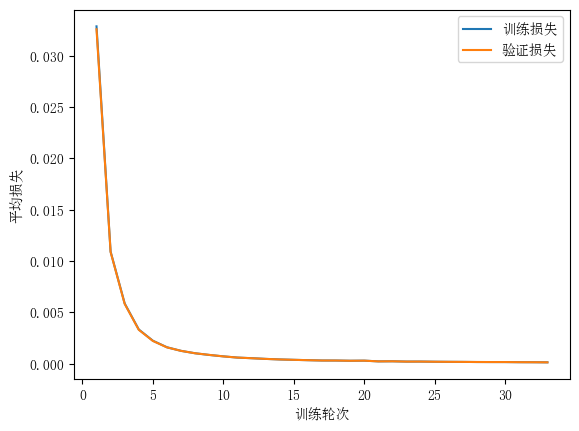

----------------------------------- Epoch: 34/50 -----------------------------------
Batch: 0%, Loss: 0.0002550367214510881
Test Loss: 0.00012874948174574643
Batch: 0%, Loss: 0.0001955604364067776
Test Loss: 0.00013815193221470665
Batch: 0%, Loss: 0.00013484797785153055
Test Loss: 0.0001492672859379912
Batch: 0%, Loss: 0.0001754323490982626
Test Loss: 0.0001598073702979396
Batch: 0%, Loss: 0.00014708329694930052
Test Loss: 0.00013898642174729845
Batch: 0%, Loss: 0.00010261373527655821
Test Loss: 0.00013264429639130924
Batch: 0%, Loss: 0.00018256627623563978
Test Loss: 0.0001355447191792671
Batch: 0%, Loss: 0.00013157234320384107
Test Loss: 0.00013540120942920586
Batch: 0%, Loss: 0.00015429485456152617
Test Loss: 0.00013575661862800422
Batch: 0%, Loss: 0.00011849783976035258
Test Loss: 0.00013000959266091657
Batch: 0%, Loss: 0.0001221407137942479
Test Loss: 0.00012697912632529776
Batch: 0%, Loss: 0.00014592638373737626
Test Loss: 0.00013430950696173994
Batch: 0%, Loss: 0.000167682513852

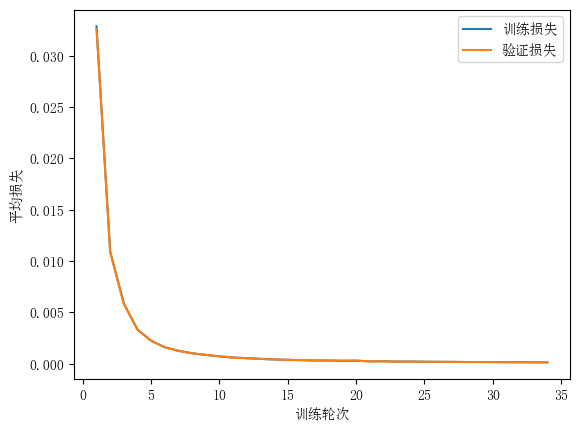

----------------------------------- Epoch: 35/50 -----------------------------------
Batch: 0%, Loss: 9.163002048286428e-05
Test Loss: 0.00012622986702769126
Batch: 0%, Loss: 0.00015803752860673331
Test Loss: 0.00012716091313381273
Batch: 0%, Loss: 0.000107408812399023
Test Loss: 0.00013054614718535198
Batch: 0%, Loss: 9.128770469187134e-05
Test Loss: 0.00012799882360645538
Batch: 0%, Loss: 0.00013535007604177125
Test Loss: 0.00013460967537190754
Batch: 0%, Loss: 0.00012336286800799986
Test Loss: 0.00012764091632151188
Batch: 0%, Loss: 0.00015855749011934353
Test Loss: 0.00013534772162674457
Batch: 0%, Loss: 0.00014994399698196396
Test Loss: 0.00012633827135347358
Batch: 0%, Loss: 9.738034343682186e-05
Test Loss: 0.00012859912877113313
Batch: 0%, Loss: 0.0001095734115358613
Test Loss: 0.00012650564292744678
Batch: 0%, Loss: 8.342983107892763e-05
Test Loss: 0.00012209110194762743
Batch: 0%, Loss: 0.00011820566622345947
Test Loss: 0.00012961948667565863
Batch: 0%, Loss: 0.000111791308627

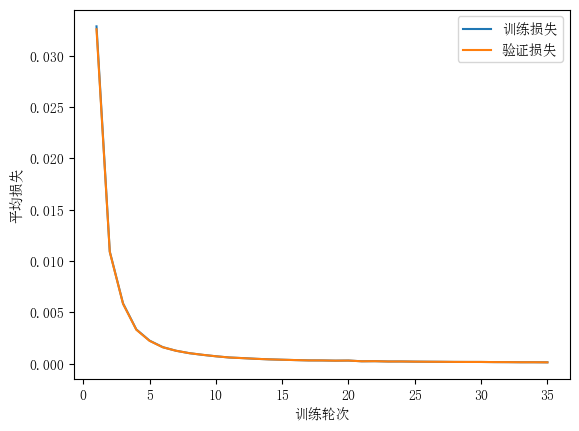

----------------------------------- Epoch: 36/50 -----------------------------------
Batch: 0%, Loss: 0.00015862997988325473
Test Loss: 0.00012011206497508871
Batch: 0%, Loss: 0.00014823933890621246
Test Loss: 0.0001255964575051242
Batch: 0%, Loss: 0.00015840995282442408
Test Loss: 0.0001300403843771448
Batch: 0%, Loss: 0.00011610145496836904
Test Loss: 0.00011894123122450215
Batch: 0%, Loss: 0.00019189972759178686
Test Loss: 0.00012259965782563368
Batch: 0%, Loss: 0.00015303874240369192
Test Loss: 0.00013542542316890484
Batch: 0%, Loss: 0.00012791346738052993
Test Loss: 0.00012772797822450217
Batch: 0%, Loss: 0.00017534472733300575
Test Loss: 0.00012760999265129029
Batch: 0%, Loss: 0.0001228977873808962
Test Loss: 0.00012746058808271705
Batch: 0%, Loss: 0.00013154198012723983
Test Loss: 0.00012433477476824092
Batch: 0%, Loss: 0.00023414490605982595
Test Loss: 0.00013023444164448066
Batch: 0%, Loss: 0.00014782723525333643
Test Loss: 0.00012259550158322992
Batch: 0%, Loss: 0.00014553452

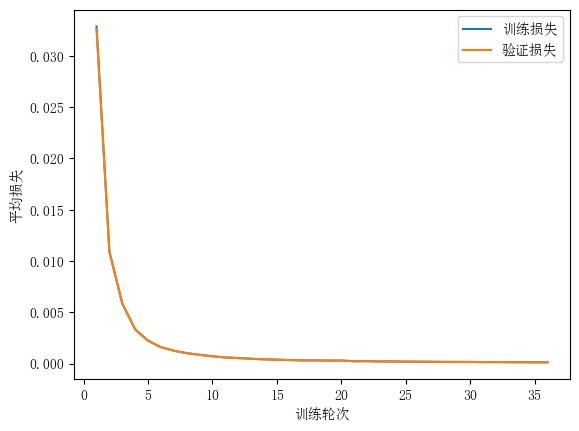

----------------------------------- Epoch: 37/50 -----------------------------------
Batch: 0%, Loss: 9.772815666392276e-05
Test Loss: 0.00011846555442375807
Batch: 0%, Loss: 0.0001588370785593576
Test Loss: 0.000124764109262396
Batch: 0%, Loss: 8.526942535041694e-05
Test Loss: 0.00012600703298346584
Batch: 0%, Loss: 0.00012261767991841635
Test Loss: 0.0001318820483067045
Batch: 0%, Loss: 0.0001244562169590285
Test Loss: 0.00011474154382400589
Batch: 0%, Loss: 9.875807787719724e-05
Test Loss: 0.00011680045911048848
Batch: 0%, Loss: 0.00012754807481336623
Test Loss: 0.00012081327365635213
Batch: 0%, Loss: 0.00011577588747184982
Test Loss: 0.00011876747739721533
Batch: 0%, Loss: 0.00013635831303062044
Test Loss: 0.00013170870504713934
Batch: 0%, Loss: 0.00010194151771095739
Test Loss: 0.00011984820553961915
Batch: 0%, Loss: 0.00011709129237875986
Test Loss: 0.00012282387125621468
Batch: 0%, Loss: 9.2289776142666e-05
Test Loss: 0.00012140550500796755
Batch: 0%, Loss: 0.0001024520551463819

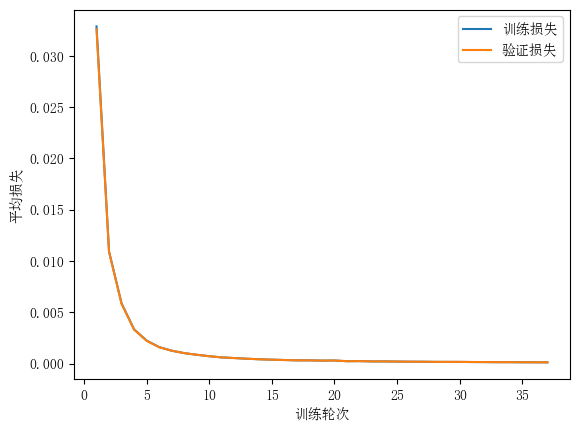

----------------------------------- Epoch: 38/50 -----------------------------------
Batch: 0%, Loss: 6.99726737287968e-05
Test Loss: 0.00011530905359337026
Batch: 0%, Loss: 0.00013580128766804857
Test Loss: 0.00011117478269223152
Batch: 0%, Loss: 0.0001120806397396231
Test Loss: 0.0001169449797599971
Batch: 0%, Loss: 0.00010094074786388369
Test Loss: 0.00012220776591307837
Batch: 0%, Loss: 0.00010774604509407213
Test Loss: 0.0001127169954246435
Batch: 0%, Loss: 0.00011824867781125978
Test Loss: 0.0001248946079811501
Batch: 0%, Loss: 9.150550079627408e-05
Test Loss: 0.00011887631921370254
Batch: 0%, Loss: 0.0001065291536616319
Test Loss: 0.00013388959884175742
Batch: 0%, Loss: 0.00011636530672117784
Test Loss: 0.00012151191796060049
Batch: 0%, Loss: 9.423460653906262e-05
Test Loss: 0.0001148191124107597
Batch: 0%, Loss: 0.00015703202388795787
Test Loss: 0.00011428067630120407
Batch: 0%, Loss: 0.00013821226442396528
Test Loss: 0.00011121380339278746
Batch: 0%, Loss: 0.000124528088848006

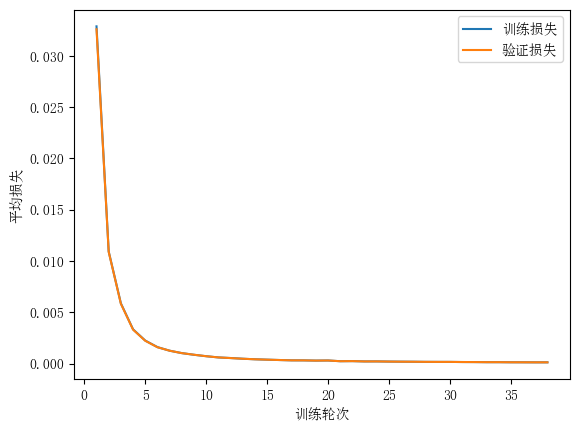

----------------------------------- Epoch: 39/50 -----------------------------------
Batch: 0%, Loss: 7.912497607452155e-05
Test Loss: 0.00011736836724415888
Batch: 0%, Loss: 0.00018759436179255335
Test Loss: 0.00011253020320086742
Batch: 0%, Loss: 0.00011009730667018878
Test Loss: 0.00010989108136401699
Batch: 0%, Loss: 0.0001971415050479231
Test Loss: 0.00011088161052105375
Batch: 0%, Loss: 0.00017069087402456885
Test Loss: 0.00010766271773665223
Batch: 0%, Loss: 0.00010052620490847396
Test Loss: 0.0001224384267783549
Batch: 0%, Loss: 0.00015510773677017374
Test Loss: 0.0001168308392998375
Batch: 0%, Loss: 0.00011615756257553877
Test Loss: 0.00011738413552543381
Batch: 0%, Loss: 8.510035827906178e-05
Test Loss: 0.0001096834205151424
Batch: 0%, Loss: 0.00011162033139673238
Test Loss: 0.00010864698889318989
Batch: 0%, Loss: 0.0001305673324811508
Test Loss: 0.00011589917787194532
Batch: 0%, Loss: 0.00010683261260405265
Test Loss: 0.00011569532640480138
Batch: 0%, Loss: 5.995498399617453

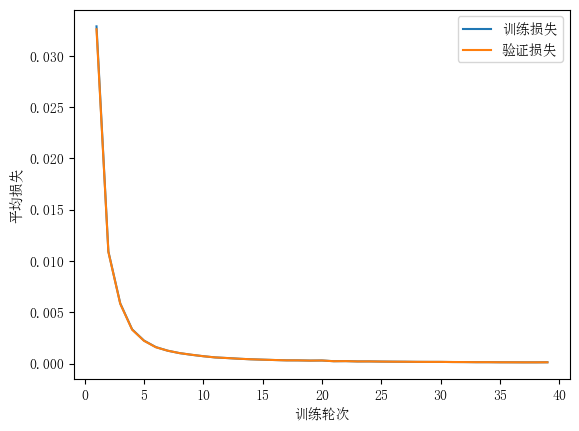

----------------------------------- Epoch: 40/50 -----------------------------------
Batch: 0%, Loss: 9.939519367192713e-05
Test Loss: 0.00012278853417935703
Batch: 0%, Loss: 7.431548720236986e-05
Test Loss: 0.00011470949112478722
Batch: 0%, Loss: 0.00011034619487262116
Test Loss: 0.00010915561693310845
Batch: 0%, Loss: 8.214757771521135e-05
Test Loss: 0.00010946041403878522
Batch: 0%, Loss: 9.316650207844141e-05
Test Loss: 0.0001056729730761395
Batch: 0%, Loss: 7.413946405177444e-05
Test Loss: 0.00011378034746197166
Batch: 0%, Loss: 0.00015988661615938613
Test Loss: 0.00011730953233769484
Batch: 0%, Loss: 0.0001621878701924848
Test Loss: 0.0001229120962269631
Batch: 0%, Loss: 0.00012187715834064086
Test Loss: 0.00010735781690084247
Batch: 0%, Loss: 0.00012839191671637037
Test Loss: 0.00012177913175756451
Batch: 0%, Loss: 0.00011761051117737196
Test Loss: 0.0001088230420167193
Batch: 0%, Loss: 0.00013738250704861606
Test Loss: 0.00010695425671303891
Batch: 0%, Loss: 0.00010081986223178

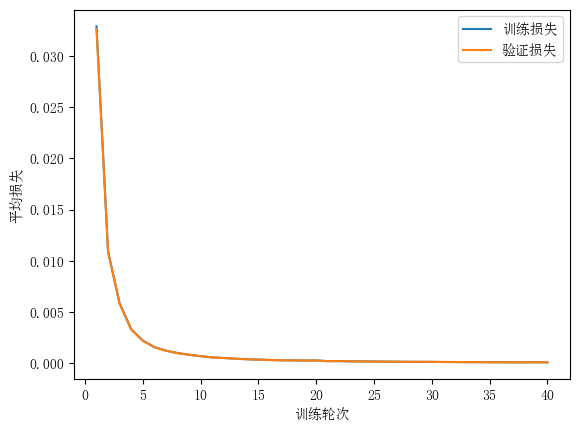

----------------------------------- Epoch: 41/50 -----------------------------------
Batch: 0%, Loss: 7.977202804863876e-05
Test Loss: 0.00010652573759721729
Batch: 0%, Loss: 0.00011107335823472065
Test Loss: 0.00011121017273484924
Batch: 0%, Loss: 0.00017956891554476436
Test Loss: 0.00011312821170777232
Batch: 0%, Loss: 0.00014706998374864792
Test Loss: 0.00011165800520675162
Batch: 0%, Loss: 9.785711238680704e-05
Test Loss: 0.00010899660789105695
Batch: 0%, Loss: 0.00015305835687312786
Test Loss: 0.0001064502956563434
Batch: 0%, Loss: 7.181719052922387e-05
Test Loss: 0.00010852735434954207
Batch: 0%, Loss: 0.00013311164992249608
Test Loss: 0.00011036335907428944
Batch: 0%, Loss: 0.00011481634850431516
Test Loss: 0.00010390332097419716
Batch: 0%, Loss: 7.206239918679899e-05
Test Loss: 0.00010437310622415415
Batch: 0%, Loss: 0.0001305216735232758
Test Loss: 0.00010483752392341614
Batch: 0%, Loss: 0.0001452039028822533
Test Loss: 0.00012261269359533535
Batch: 0%, Loss: 0.000101724249543

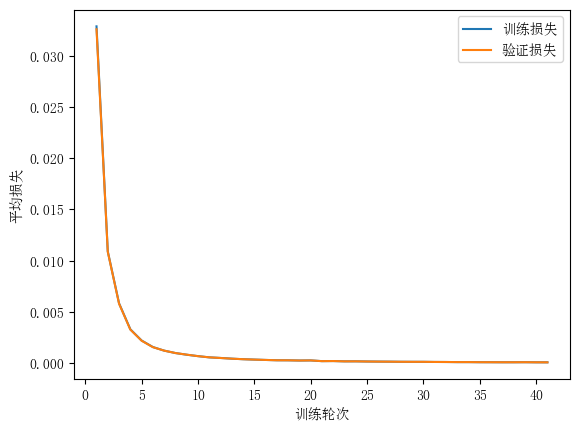

----------------------------------- Epoch: 42/50 -----------------------------------
Batch: 0%, Loss: 8.720528730608228e-05
Test Loss: 0.00010404015277679263
Batch: 0%, Loss: 0.00019001070332070333
Test Loss: 0.00010046026178776864
Batch: 0%, Loss: 8.651399427872592e-05
Test Loss: 9.91715513803481e-05
Batch: 0%, Loss: 8.284976227959502e-05
Test Loss: 0.00010395868756777798
Batch: 0%, Loss: 0.0001465319743779474
Test Loss: 0.00010933412696313226
Batch: 0%, Loss: 0.00016154872861449967
Test Loss: 0.00010149868084894105
Batch: 0%, Loss: 0.00013309129263379215
Test Loss: 0.00010374443873958138
Batch: 0%, Loss: 0.00013077578697908338
Test Loss: 0.00010145302305173746
Batch: 0%, Loss: 8.539149889735069e-05
Test Loss: 0.00010122344466041765
Batch: 0%, Loss: 8.283099490516408e-05
Test Loss: 0.00010011767958171855
Batch: 0%, Loss: 0.0001637752137920522
Test Loss: 0.0001306051996438819
Batch: 0%, Loss: 0.00013122111691388512
Test Loss: 0.00010911715200785118
Batch: 0%, Loss: 9.336759335187213e-0

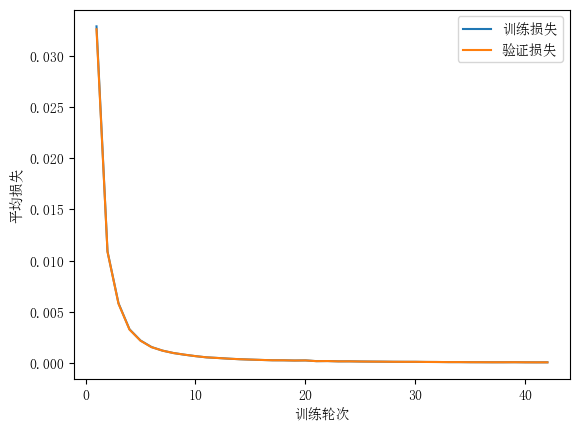

----------------------------------- Epoch: 43/50 -----------------------------------
Batch: 0%, Loss: 8.892841229246338e-05
Test Loss: 0.00010310527928636947
Batch: 0%, Loss: 9.992331487474597e-05
Test Loss: 0.00010330958169017558
Batch: 0%, Loss: 0.0001382856545578671
Test Loss: 9.867113399911158e-05
Batch: 0%, Loss: 0.0001002885195102235
Test Loss: 0.00010611534372748362
Batch: 0%, Loss: 8.457048910205847e-05
Test Loss: 0.00010860510320396619
Batch: 0%, Loss: 0.0001368285712279239
Test Loss: 9.906212077229294e-05
Batch: 0%, Loss: 0.00011341866962923156
Test Loss: 9.692103377473671e-05
Batch: 0%, Loss: 8.848141337112377e-05
Test Loss: 9.795731637611191e-05
Batch: 0%, Loss: 0.0001436983661952474
Test Loss: 0.00010012565254314446
Batch: 0%, Loss: 0.00011799632266992024
Test Loss: 0.00012020882210374368
Batch: 0%, Loss: 7.994336262757154e-05
Test Loss: 0.00010318644563521613
Batch: 0%, Loss: 8.414711979023794e-05
Test Loss: 0.00010482001414447662
Batch: 0%, Loss: 7.9828642393533e-05
Test

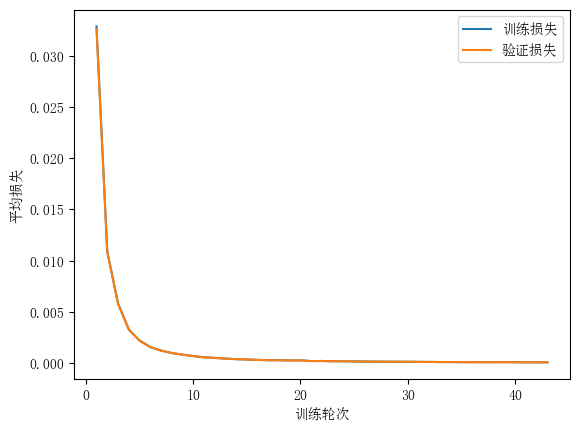

----------------------------------- Epoch: 44/50 -----------------------------------
Batch: 0%, Loss: 0.00010716208065867448
Test Loss: 0.00010338582775754195
Batch: 0%, Loss: 0.00014807330403745597
Test Loss: 9.939970887625056e-05
Batch: 0%, Loss: 9.48229623606429e-05
Test Loss: 9.793044702863344e-05
Batch: 0%, Loss: 0.00010313914528214144
Test Loss: 0.00010327743998960113
Batch: 0%, Loss: 7.566186710332719e-05
Test Loss: 9.299838053913366e-05
Batch: 0%, Loss: 8.068289957277829e-05
Test Loss: 9.334552385531807e-05
Batch: 0%, Loss: 5.874059500950031e-05
Test Loss: 9.535227997935049e-05
Batch: 0%, Loss: 0.00014194236839960132
Test Loss: 9.482604900324316e-05
Batch: 0%, Loss: 6.63418867877293e-05
Test Loss: 9.615701921384748e-05
Batch: 0%, Loss: 8.366906704279368e-05
Test Loss: 9.544676711689485e-05
Batch: 0%, Loss: 7.828163693713507e-05
Test Loss: 9.557205380375075e-05
Batch: 0%, Loss: 0.0001790109482305081
Test Loss: 9.551479732482528e-05
Batch: 0%, Loss: 0.0001751446991246343
Test Los

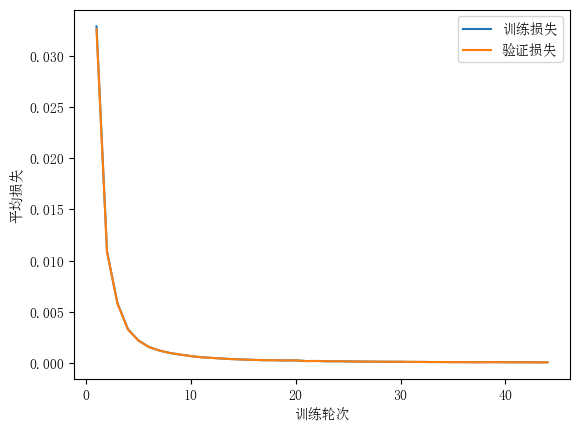

----------------------------------- Epoch: 45/50 -----------------------------------
Batch: 0%, Loss: 5.882377430011766e-05
Test Loss: 9.648776720868753e-05
Batch: 0%, Loss: 0.00012265521931839713
Test Loss: 9.341321188672718e-05
Batch: 0%, Loss: 7.674487384170036e-05
Test Loss: 9.604784597489685e-05
Batch: 0%, Loss: 8.525045820742927e-05
Test Loss: 9.46605709016646e-05
Batch: 0%, Loss: 8.00421247313494e-05
Test Loss: 9.428030278645449e-05
Batch: 0%, Loss: 7.583811897365635e-05
Test Loss: 9.427919005593233e-05
Batch: 0%, Loss: 0.00010671371098509245
Test Loss: 9.225966581999843e-05
Batch: 0%, Loss: 0.00012641611003938626
Test Loss: 0.00010026104313760477
Batch: 0%, Loss: 8.791625163246832e-05
Test Loss: 9.619045620306633e-05
Batch: 0%, Loss: 7.659581214217943e-05
Test Loss: 9.849973172929796e-05
Batch: 0%, Loss: 0.0001310485700999684
Test Loss: 9.897606662372006e-05
Batch: 0%, Loss: 6.172655512412401e-05
Test Loss: 9.84505156951006e-05
Batch: 0%, Loss: 9.662868377111293e-05
Test Loss: 

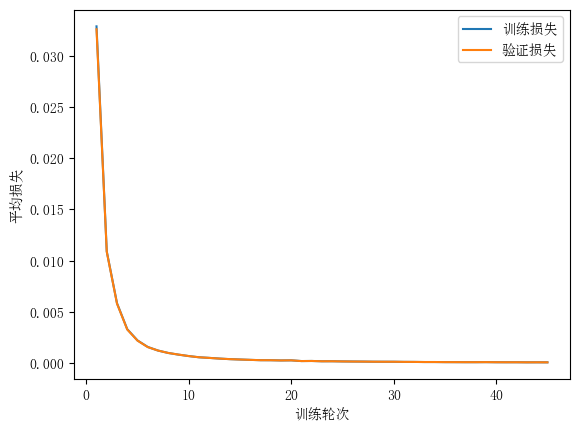

----------------------------------- Epoch: 46/50 -----------------------------------
Batch: 0%, Loss: 8.708611217962949e-05
Test Loss: 9.448762612617453e-05
Batch: 0%, Loss: 8.122404310629287e-05
Test Loss: 9.469789520604476e-05
Batch: 0%, Loss: 0.00012115911772677842
Test Loss: 9.639718850087685e-05
Batch: 0%, Loss: 9.735162239171495e-05
Test Loss: 8.99321409083798e-05
Batch: 0%, Loss: 0.00011556605704513755
Test Loss: 9.43828673859089e-05
Batch: 0%, Loss: 0.00014155950810146976
Test Loss: 0.00010102285004710036
Batch: 0%, Loss: 8.987292362301985e-05
Test Loss: 9.371227537236295e-05
Batch: 0%, Loss: 0.00013150846805463668
Test Loss: 9.51483255267854e-05
Batch: 0%, Loss: 0.00013234724764168531
Test Loss: 0.0001008334699495413
Batch: 0%, Loss: 0.00011468031132674622
Test Loss: 9.949327459491325e-05
Batch: 0%, Loss: 6.967207219896216e-05
Test Loss: 9.026187727359473e-05
Batch: 0%, Loss: 7.181592686329278e-05
Test Loss: 8.957113675668611e-05
Batch: 0%, Loss: 8.012975602798531e-05
Test Los

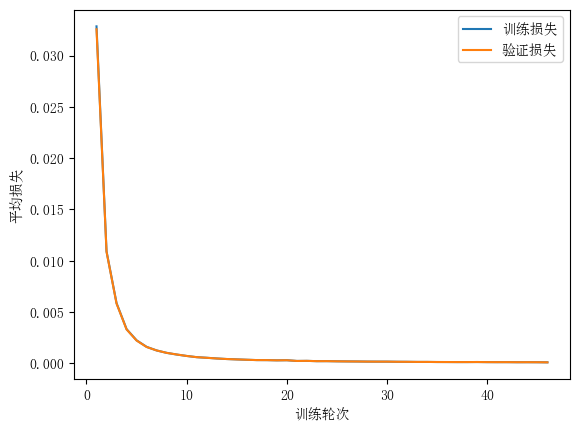

----------------------------------- Epoch: 47/50 -----------------------------------
Batch: 0%, Loss: 8.039079448378514e-05
Test Loss: 8.886965542308353e-05
Batch: 0%, Loss: 0.00012362547453096415
Test Loss: 9.238342416017678e-05
Batch: 0%, Loss: 9.836013493735614e-05
Test Loss: 9.67264502714195e-05
Batch: 0%, Loss: 0.00010178706655218024
Test Loss: 8.872965532760107e-05
Batch: 0%, Loss: 9.981944250486676e-05
Test Loss: 8.962869214399094e-05
Batch: 0%, Loss: 7.550506212584526e-05
Test Loss: 8.901045202329488e-05
Batch: 0%, Loss: 0.000100357976211162
Test Loss: 8.794008102650993e-05
Batch: 0%, Loss: 9.698408016097097e-05
Test Loss: 9.38210029242485e-05
Batch: 0%, Loss: 9.69134063555113e-05
Test Loss: 9.081955665688955e-05
Batch: 0%, Loss: 8.204421238556649e-05
Test Loss: 8.536688451095513e-05
Batch: 0%, Loss: 5.327368875966468e-05
Test Loss: 9.119095823577862e-05
Batch: 0%, Loss: 0.000103491391783432
Test Loss: 9.397601272171655e-05
Batch: 0%, Loss: 0.00010182723330958046
Test Loss: 8.7

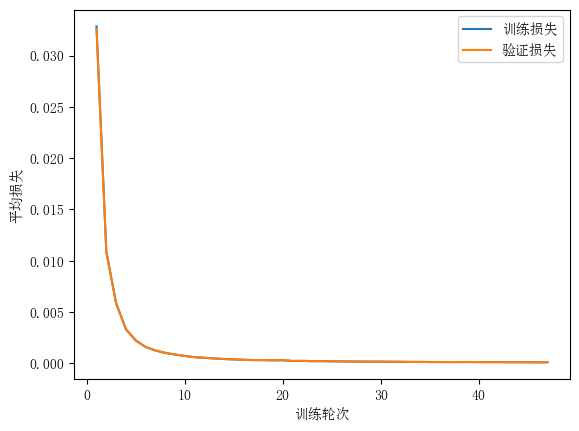

----------------------------------- Epoch: 48/50 -----------------------------------
Batch: 0%, Loss: 6.737394741470487e-05
Test Loss: 9.836012710594749e-05
Batch: 0%, Loss: 0.00010404437082375036
Test Loss: 9.690354276623063e-05
Batch: 0%, Loss: 9.520045768027004e-05
Test Loss: 9.769292170176671e-05
Batch: 0%, Loss: 7.403151554293448e-05
Test Loss: 9.993505057062368e-05
Batch: 0%, Loss: 0.00010911494407328825
Test Loss: 9.30849352319788e-05
Batch: 0%, Loss: 8.747184613185775e-05
Test Loss: 9.009849898945317e-05
Batch: 0%, Loss: 8.286716140292503e-05
Test Loss: 8.933236924322103e-05
Batch: 0%, Loss: 9.34183392834597e-05
Test Loss: 9.011344592331348e-05
Batch: 0%, Loss: 0.00011859554774917773
Test Loss: 9.643995601777534e-05
Batch: 0%, Loss: 0.0001283284342290995
Test Loss: 8.70481987916999e-05
Batch: 0%, Loss: 7.178901091990842e-05
Test Loss: 8.823931901929715e-05
Batch: 0%, Loss: 6.433257697768832e-05
Test Loss: 9.026373949890089e-05
Batch: 0%, Loss: 8.492048705988696e-05
Test Loss: 8

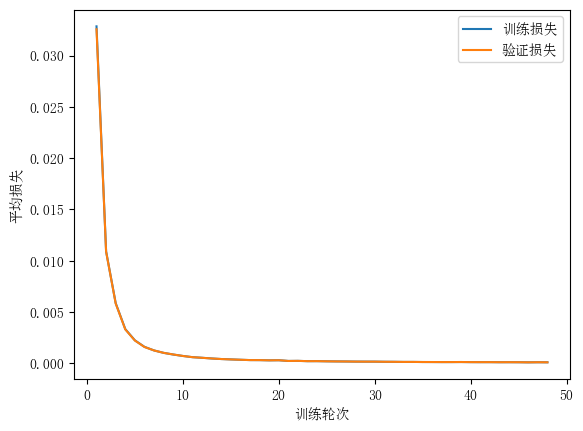

----------------------------------- Epoch: 49/50 -----------------------------------
Batch: 0%, Loss: 9.250671598927901e-05
Test Loss: 8.695188882066262e-05
Batch: 0%, Loss: 0.00010813877448798058
Test Loss: 8.986532238662557e-05
Batch: 0%, Loss: 5.782196812859009e-05
Test Loss: 8.490972861437056e-05
Batch: 0%, Loss: 0.00010822797285464062
Test Loss: 8.334436941853474e-05
Batch: 0%, Loss: 7.070051569775995e-05
Test Loss: 8.328041182165477e-05
Batch: 0%, Loss: 0.00010788635577114734
Test Loss: 8.674850833625345e-05
Batch: 0%, Loss: 7.345348003389035e-05
Test Loss: 9.115795018983088e-05
Batch: 0%, Loss: 6.690852897282023e-05
Test Loss: 8.378776671838922e-05
Batch: 0%, Loss: 5.125020209259996e-05
Test Loss: 8.465894952900595e-05
Batch: 0%, Loss: 7.711265884469857e-05
Test Loss: 8.995908551725442e-05
Batch: 0%, Loss: 8.3173792325699e-05
Test Loss: 8.624656274176393e-05
Batch: 0%, Loss: 8.205113279733563e-05
Test Loss: 8.959430965232467e-05
Batch: 0%, Loss: 0.00014679083839409706
Test Loss:

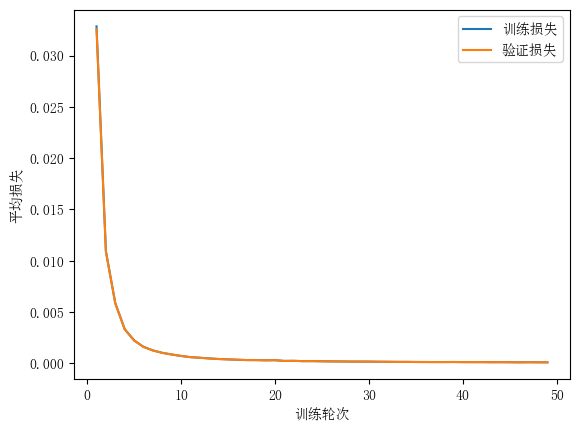

----------------------------------- Epoch: 50/50 -----------------------------------
Batch: 0%, Loss: 7.108747162170232e-05
Test Loss: 8.520823423544278e-05
Batch: 0%, Loss: 5.2050882801700886e-05
Test Loss: 9.124438201362323e-05
Batch: 0%, Loss: 6.952635889776895e-05
Test Loss: 8.940091077355059e-05
Batch: 0%, Loss: 0.00010840095907103576
Test Loss: 8.861795306325624e-05
Batch: 0%, Loss: 9.341683968192359e-05
Test Loss: 9.005206876195277e-05
Batch: 0%, Loss: 8.352376646798434e-05
Test Loss: 8.339491763347662e-05
Batch: 0%, Loss: 8.583413519617474e-05
Test Loss: 9.396017188335068e-05
Batch: 0%, Loss: 7.381558026912923e-05
Test Loss: 8.749305673654902e-05
Batch: 0%, Loss: 7.678771935893475e-05
Test Loss: 9.085972503802225e-05
Batch: 0%, Loss: 5.1031378748762096e-05
Test Loss: 8.244547401683272e-05
Batch: 0%, Loss: 8.021207300260159e-05
Test Loss: 8.556671597266896e-05
Batch: 0%, Loss: 6.751082248787118e-05
Test Loss: 8.696230318569984e-05
Batch: 0%, Loss: 8.159826867624266e-05
Test Loss

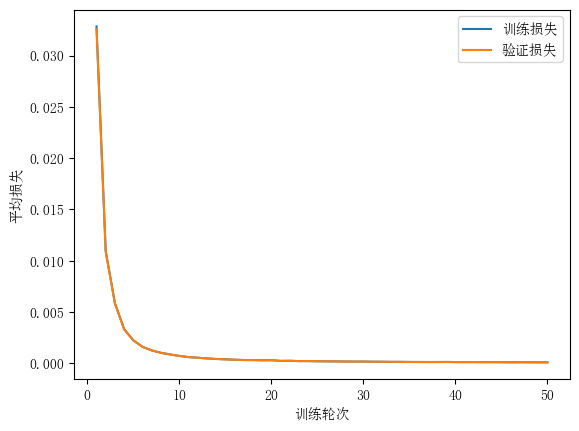

训练集损失: 8.179926015927198e-05
测试集损失: 8.19280811051059e-05


In [5]:
import sys
sys.path.append(r"../../../") 

from Networks.nn import NN_pricing_GLU
from Networks.train_utils import train_model
from torch.nn import MSELoss

device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')


hyperparams = { 
    "input_dim": 4,
    'hidden_dim': 64, 
    'hidden_nums': 4, 
    'output_dim': 88
}

model = NN_pricing_GLU(hyperparams).to(device=device, dtype=torch.float64)

loss_MSE = MSELoss()
optim_Adam = torch.optim.Adam(model.parameters(), lr=0.0001)

tain_loss_lst, test_loss_lst = train_model( 
    loss_MSE, 
    optim_Adam, 
    model, 
    data_loader, 
    train_data, 
    test_data, 
    save_path= r'train_pic_GLU.pdf',
    epochs=50
)

print(f"训练集损失: {tain_loss_lst[-1]}")
print(f"测试集损失: {test_loss_lst[-1]}")

In [ ]:
torch.save(model.state_dict(), r"../../../Results/models/GLU_rBergomi_flat_forward_variance.pth")

print("模型已保存")

模型已保存
